In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

In [2]:
# Load training set
df = pd.read_csv("train.csv")
print(f"Dataset loaded successfully!")
print(f"Shape: {df.shape[0]} rows × {df.shape[1]} columns")

Dataset loaded successfully!
Shape: 215258 rows × 122 columns


## **Data Understanding:**
*This is where we have a quick look at the dataset*

**Dataset Overview:**: The Credit Scoring training data contains 215258 rows ( each row representing a unique loan record ) and 122 features, including client demographics & information, loan characteristics, income, credit history, assets, residency, and many flags that reflect financial behavior. The goal is binary credit-risk classification: predict if a client will repay the loan (TARGET=0) or face repayment difficulty (TARGET=1)

| **Identification & Loan Characteristics & Target variable** | **Client Demographics & Information** | **Region & Residency Information ( features with suffixes _AVG,_MODE & _MEDI )** | **Other Financial Factor** |
|:--|:--|:--|:--|
| ID | CODE_GENDER | APARTMENTS_ + suffixes| EXT_SOURCE_1 |
| NAME_CONTRACT_TYPE | FLAG_PHONE | BASEMENTAREA_ + suffixes | EXT_SOURCE_2 |
| AMT_INCOME_TOTAL | FLAG_OWN_CAR | YEARS_BEGINEXPLUATATION_ + suffixes | EXT_SOURCE_3 |
| AMT_CREDIT | FLAG_OWN_REALTY | YEARS_BUILD_ + suffixes | OBS_30_CNT_SOCIAL_CIRCLE |
| AMT_ANNUITY | CNT_CHILDREN | COMMONAREA_ + suffixes |DEF_30_CNT_SOCIAL_CIRCLE  |
| AMT_GOODS_PRICE | NAME_INCOME_TYPE | ELEVATORS_ + suffixes |OBS_60_CNT_SOCIAL_CIRCLE |
| NAME_TYPE_SUITE | NAME_EDUCATION_TYPE | ENTRANCES_ + suffixes | DEF_60_CNT_SOCIAL_CIRCLE |
| WEEKDAY_APPR_PROCESS_START | NAME_FAMILY_STATUS  | FLOORSMAX_ + suffixes | FLAG_DOCUMENT_2 to FLAG_DOCUMENT_21 |
| HOUR_APPR_PROCESS_START | NAME_HOUSING_TYPE | FLOORSMIN_ + suffixes | AMT_REQ_CREDIT_BUREAU_HOUR |
| TARGET | REGION_POPULATION_RELATIVE | LANDAREA_ + suffixes | AMT_REQ_CREDIT_BUREAU_DAY |
|  | DAYS_BIRTH | LIVINGAPARTMENTS_ + suffixes |AMT_REQ_CREDIT_BUREAU_WEEK  |
|  | DAYS_EMPLOYED | LIVINGAREA_ + suffixes |AMT_REQ_CREDIT_BUREAU_MON |
|  | DAYS_REGISTRATION | NONLIVINGAPARTMENTS_ + suffixes |AMT_REQ_CREDIT_BUREAU_QRT |
|  | DAYS_ID_PUBLISH | NONLIVINGAREA_ + suffixes | AMT_REQ_CREDIT_BUREAU_YEAR |
|  | OWN_CAR_AGE | FONDKAPREMONT_MODE | |
|  | OCCUPATION_TYPE  | HOUSETYPE_MODE | |
|  | CNT_FAM_MEMBERS | TOTALAREA_MODE | |
|  | ORGANIZATION_TYPE | WALLSMATERIAL_MODE | |
|  | FLAG_MOBIL | EMERGENCYSTATE_MODE | |
|  |FLAG_EMP_PHONE  | REGION_RATING_CLIENT | |
|  | FLAG_WORK_PHONE | REGION_RATING_CLIENT_W_CITY | |
| | FLAG_CONT_MOBILE | REG_REGION_NOT_LIVE_REGION | |
|  | FLAG_PHONE | REG_REGION_NOT_WORK_REGION | | 
|  | FLAG_EMAIL | LIVE_REGION_NOT_WORK_REGION | |
|  | DAYS_LAST_PHONE_CHANGE | REG_CITY_NOT_LIVE_CITY | |
|  |  | REG_CITY_NOT_WORK_CITY | |
|  |  | LIVE_CITY_NOT_WORK_CITY | |

##### **Identification & Loan Characteristics:**
* ID: Unique identifier for each loan application
* NAME_CONTRACT_TYPE: Identification if loan is cash or revolving.
* AMT_INCOME_TOTAL: Income of the client.
* AMT_CREDIT: Credit amount of the loan. 
* AMT_ANNUITY: Loan annuity (amount to be paid periodically).
* AMT_GOODS_PRICE: For consumer loans, it is the price of the goods for which the loan is given.
* NAME_TYPE_SUITE: Who was accompanying the client when they applied for the loan
* WEEKDAY_APPR_PROCESS_START: On which day of the week did the client apply for the loan.
* HOUR_APPR_PROCESS_START: Approximately at what hour did the client apply for the loan.
* TARGET: Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)",

#### **Client Demographics & Information**
* CODE_GENDER: Gender of the client
* FLAG_OWN_CAR: Flag if the client owns a car.
* FLAG_OWN_REALTY: Flag if the client owns a house or flat
* CNT_CHILDREN: Number of children the client has. 
* NAME_INCOME_TYPE: Client's income type (businessman, working, maternity leave, etc.).
* NAME_EDUCATION_TYPE: Level of highest education the client achieved.
* NAME_FAMILY_STATUS: Family status of the client
* NAME_HOUSING_TYPE: What is the housing situation of the client (renting, living with parents, ...).
* REGION_POPULATION_RELATIVE: Normalized population of region where client lives (higher number means the client lives in a more populated area).
* DAYS_BIRTH: Client's age in days at the time of application (values are negative).
* DAYS_EMPLOYED: How many days before the application the person started current employment (values are negative).
* DAYS_REGISTRATION: How many days before the application did client change his registration.
* DAYS_ID_PUBLISH: How many days before the application did client change the identity document with which he applied for the loan.
* OWN_CAR_AGE: Age of client's car.
* OCCUPATION_TYPE: What kind of occupation does the client have.
* CNT_FAM_MEMBERS: How many family members does the client have.
* ORGANIZATION_TYPE: Type of organization where client works.
* FLAG_MOBIL: Did the client provide a mobile phone number (1=YES, 0=NO).
* FLAG_EMP_PHONE: Did the client provide an employer phone number.
* FLAG_WORK_PHONE: Did the client provide a work phone number.
* FLAG_CONT_MOBILE: Was the mobile phone reachable.
* FLAG_WORK_PHONE: Did the client provide a work phone number. 
* FLAG_CONT_MOBILE: Was the mobile phone reachable.
* FLAG_PHONE: Did the client provide a home phone number.
* FLAG_EMAIL: Did the client provide an email address
* DAYS_LAST_PHONE_CHANGE: How many days before the application did the client change phone.

#### **Region & Residency information**
* REGION_RATING_CLIENT: Our rating of the region where the client lives (1, 2, or 3).
* REGION_RATING_CLIENT_W_CITY: Our rating of the region where the client lives with taking city into account (1, 2, or 3).
* REG_REGION_NOT_LIVE_REGION: Flag if client's permanent address does not match contact address (within same region).
* REG_REGION_NOT_WORK_REGION: Flag if client's permanent address does not match work address (within same region).
* LIVE_REGION_NOT_WORK_REGION: Flag if client's contact address does not match work address (within same region).
* REG_CITY_NOT_LIVE_CITY: Flag if client's permanent address does not match contact address (within same city).
* REG_CITY_NOT_WORK_CITY: Flag if client's permanent address does not match work address (within same city).
* LIVE_CITY_NOT_WORK_CITY: Flag if client's contact address does not match work address (within same city).

##### *The features below contain normalized information about the building where the client lives. The suffixes _AVG, _MODE, and _MEDI represent the average, mode, and median values, respectively.*

* APARTMENTS_: Information about building where the client lives.
* BASEMENTAREA_: information about building where the client lives.
* YEARS_BEGINEXPLUATATION_: information about building where the client lives.
* YEARS_BUILD_: information about building where the client lives.
* COMMONAREA_:  information about building where the client lives.
* ELEVATORS_: information about building where the client lives. 
* ENTRANCES_: information about building where the client lives.
* FLOORSMAX_: information about building where the client lives. 
* FLOORSMIN_: information about building where the client lives.
* LANDAREA_: information about building where the client lives.
* LIVINGAPARTMENTS_: information about building where the client lives.
* LIVINGAREA_: information about building where the client lives.
* NONLIVINGAPARTMENTS_: information about building where the client lives.
* NONLIVINGAREA_: information about building where the client lives.

#### **Other Financial Factors**
* EXT_SOURCE_1, EXT_SOURCE_2, EXT_SOURCE_3: Normalized scores from external data sources (e.g., credit bureaus). 
* OBS_30_CNT_SOCIAL_CIRCLE: How many observations of client's social surroundings with observable 30 DPD (days past due) default.
* DEF_30_CNT_SOCIAL_CIRCLE: How many observations of client's social surroundings defaulted on 30 DPD (days past due).
* OBS_60_CNT_SOCIAL_CIRCLE: Same as above but for 60 days.
* DEF_60_CNT_SOCIAL_CIRCLE: Same as above but for 60 days.
* FLAG_DOCUMENT_2 to FLAG_DOCUMENT_21: Did client provide document X (various types of documents).
* AMT_REQ_CREDIT_BUREAU_HOUR: Number of enquiries to Credit Bureau about the client one hour before application.
* AMT_REQ_CREDIT_BUREAU_DAY: Number of enquiries to Credit Bureau about the client one day before application.
* AMT_REQ_CREDIT_BUREAU_WEEK: Number of enquiries to Credit Bureau about the client one week before application.
* AMT_REQ_CREDIT_BUREAU_MON: Number of enquiries to Credit Bureau about the client one month before application.
* AMT_REQ_CREDIT_BUREAU_QRT: Number of enquiries to Credit Bureau about the client 3 months before application.
* AMT_REQ_CREDIT_BUREAU_YEAR: Number of enquiries to Credit Bureau about the client one year before application.


# **DATA EXPLORING**

In [3]:
client_demo_cols = [
    'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
    'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
    'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
    'OWN_CAR_AGE', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'ORGANIZATION_TYPE',
    'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
    'DAYS_LAST_PHONE_CHANGE'
]

col_desc = pd.read_csv('column description.csv')
col_desc_dict = dict(zip(col_desc['Row'], col_desc['Description']))
demo_info = pd.DataFrame({
    'Column': client_demo_cols,
    'Description': [col_desc_dict.get(col, 'N/A') for col in client_demo_cols],
    'Data_Type': [str(df[col].dtype) for col in client_demo_cols],
    'Unique_Values': [df[col].nunique() for col in client_demo_cols],
})

pd.set_option('display.max_colwidth', 80)
demo_info[['Column', 'Description', 'Data_Type', 'Unique_Values', ]]

,Column,Description,Data_Type,Unique_Values
0,CODE_GENDER,Gender of the client,object,3
1,FLAG_OWN_CAR,Flag if the client owns a car,object,2
2,FLAG_OWN_REALTY,Flag if client owns a house or flat,object,2
3,CNT_CHILDREN,Number of children the client has,int64,15
4,NAME_INCOME_TYPE,"Clients income type (businessman, working, maternity leave, )",object,8
5,NAME_EDUCATION_TYPE,Level of highest education the client achieved,object,5
6,NAME_FAMILY_STATUS,Family status of the client,object,6
7,NAME_HOUSING_TYPE,"What is the housing situation of the client (renting, living with parents, ...)",object,6
8,REGION_POPULATION_RELATIVE,Normalized population of region where client lives (higher number means the ...,float64,80
9,DAYS_BIRTH,Client's age in days at the time of application,int64,17372


#### Giải thích kỹ hơn về các biến khó hỉu

* DAYS_BIRTH + DAYS_EMPLOYED + DAYS_REGISTRATION + DAYS_ID_PUBLISH: Các giá trị thời gian này tính theo ngày nhưng đều là số âm, vì nó biểu diễn cho số ngày đã qua trong quá khứ.
* OWN_CAR_AGE: Tuổi của xe hay có nghĩa là số năm đã có xe, nếu giá trị là NaN nghĩa là họ không / chưa có xe.
* CNT_FAM_MEMBERS: Có data type là float64 chứ ko phải int64, giá trị float có thể do việc làm tròn dữ liệu từ xác minh phân phối



## **Duplicate Customer Check**


In [4]:
# check xem có ID khách hàng bị trùng không
duplicate_ids = df['ID'].duplicated().sum()
print(f"Total duplicate IDs: {duplicate_ids}")
print(f"Total unique customers: {df['ID'].nunique()}")
print(f"Total records: {len(df)}")

if duplicate_ids > 0:
    print(f"Found {duplicate_ids} duplicate customer IDs")
else:
    print("\nNo duplicate IDs found")
    
# Groupby ID khách hàng để check xem cùng 1 khách có nhiều khoản vay không
customer_counts = df.groupby('ID').size().reset_index(name='loan_count')
multi_loan_customers = customer_counts[customer_counts['loan_count'] > 1]

print(f"\nCustomers with multiple loans: {len(multi_loan_customers)}")

Total duplicate IDs: 0
Total unique customers: 215258
Total records: 215258

No duplicate IDs found

Customers with multiple loans: 0


## **Distribution Analysis w/ Histograms**

In [5]:
from scipy import stats

# Chia cột categorical vs numerical
demo_df = df[client_demo_cols].copy()
numerical_demo = demo_df.select_dtypes(include=[np.number]).columns.tolist()
categorical_demo = demo_df.select_dtypes(include=['object']).columns.tolist()

print(f"\nNumerical variables: {len(numerical_demo)} variables")
print(f"Categorical variables: {len(categorical_demo)} variables")

# Tạo bảng thống kê phân phối cho các biến numerical
dist_stats = []
for col in numerical_demo:
    data = df[col].dropna()
    if len(data) > 0:
        dist_stats.append({
            'Variable': col,
            'Mean': data.mean(),
            'Median': data.median(),
            'Std': data.std(),
            'Skewness': stats.skew(data),
            'Kurtosis': stats.kurtosis(data),
            'Min': data.min(),
            'Max': data.max()
        })

dist_df = pd.DataFrame(dist_stats)
dist_df['Distribution'] = dist_df.apply(lambda x: 
    'Normal' if abs(x['Skewness']) < 0.5 and abs(x['Kurtosis']) < 3 
    else ('Right-skewed' if x['Skewness'] > 0.5 
    else ('Left-skewed' if x['Skewness'] < -0.5 
    else 'Moderately skewed')), axis=1)

dist_df.round(3)


Numerical variables: 15 variables
Categorical variables: 9 variables


,Variable,Mean,Median,Std,Skewness,Kurtosis,Min,Max,Distribution
0,CNT_CHILDREN,0.417,0.000,0.723,1.970,7.391,0.000,19.000,Right-skewed
1,REGION_POPULATION_RELATIVE,0.021,0.019,0.014,1.489,3.263,0.001,0.073,Right-skewed
2,DAYS_BIRTH,-16037.328,-15747.000,4369.586,-0.116,-1.051,-25201.000,-7673.000,Normal
3,DAYS_EMPLOYED,63865.074,-1213.000,141314.891,1.663,0.768,-17546.000,365243.000,Right-skewed
4,DAYS_REGISTRATION,-4985.650,-4498.000,3524.731,-0.592,-0.323,-23738.000,0.000,Left-skewed
5,DAYS_ID_PUBLISH,-2994.078,-3256.000,1510.878,0.349,-1.109,-7197.000,0.000,Normal
6,OWN_CAR_AGE,12.074,9.000,11.970,2.741,9.160,0.000,69.000,Right-skewed
7,CNT_FAM_MEMBERS,2.153,2.000,0.912,0.989,2.644,1.000,20.000,Right-skewed
8,FLAG_MOBIL,1.000,1.000,0.002,-463.956,215253.000,0.000,1.000,Left-skewed
9,FLAG_EMP_PHONE,0.820,1.000,0.384,-1.664,0.768,0.000,1.000,Left-skewed


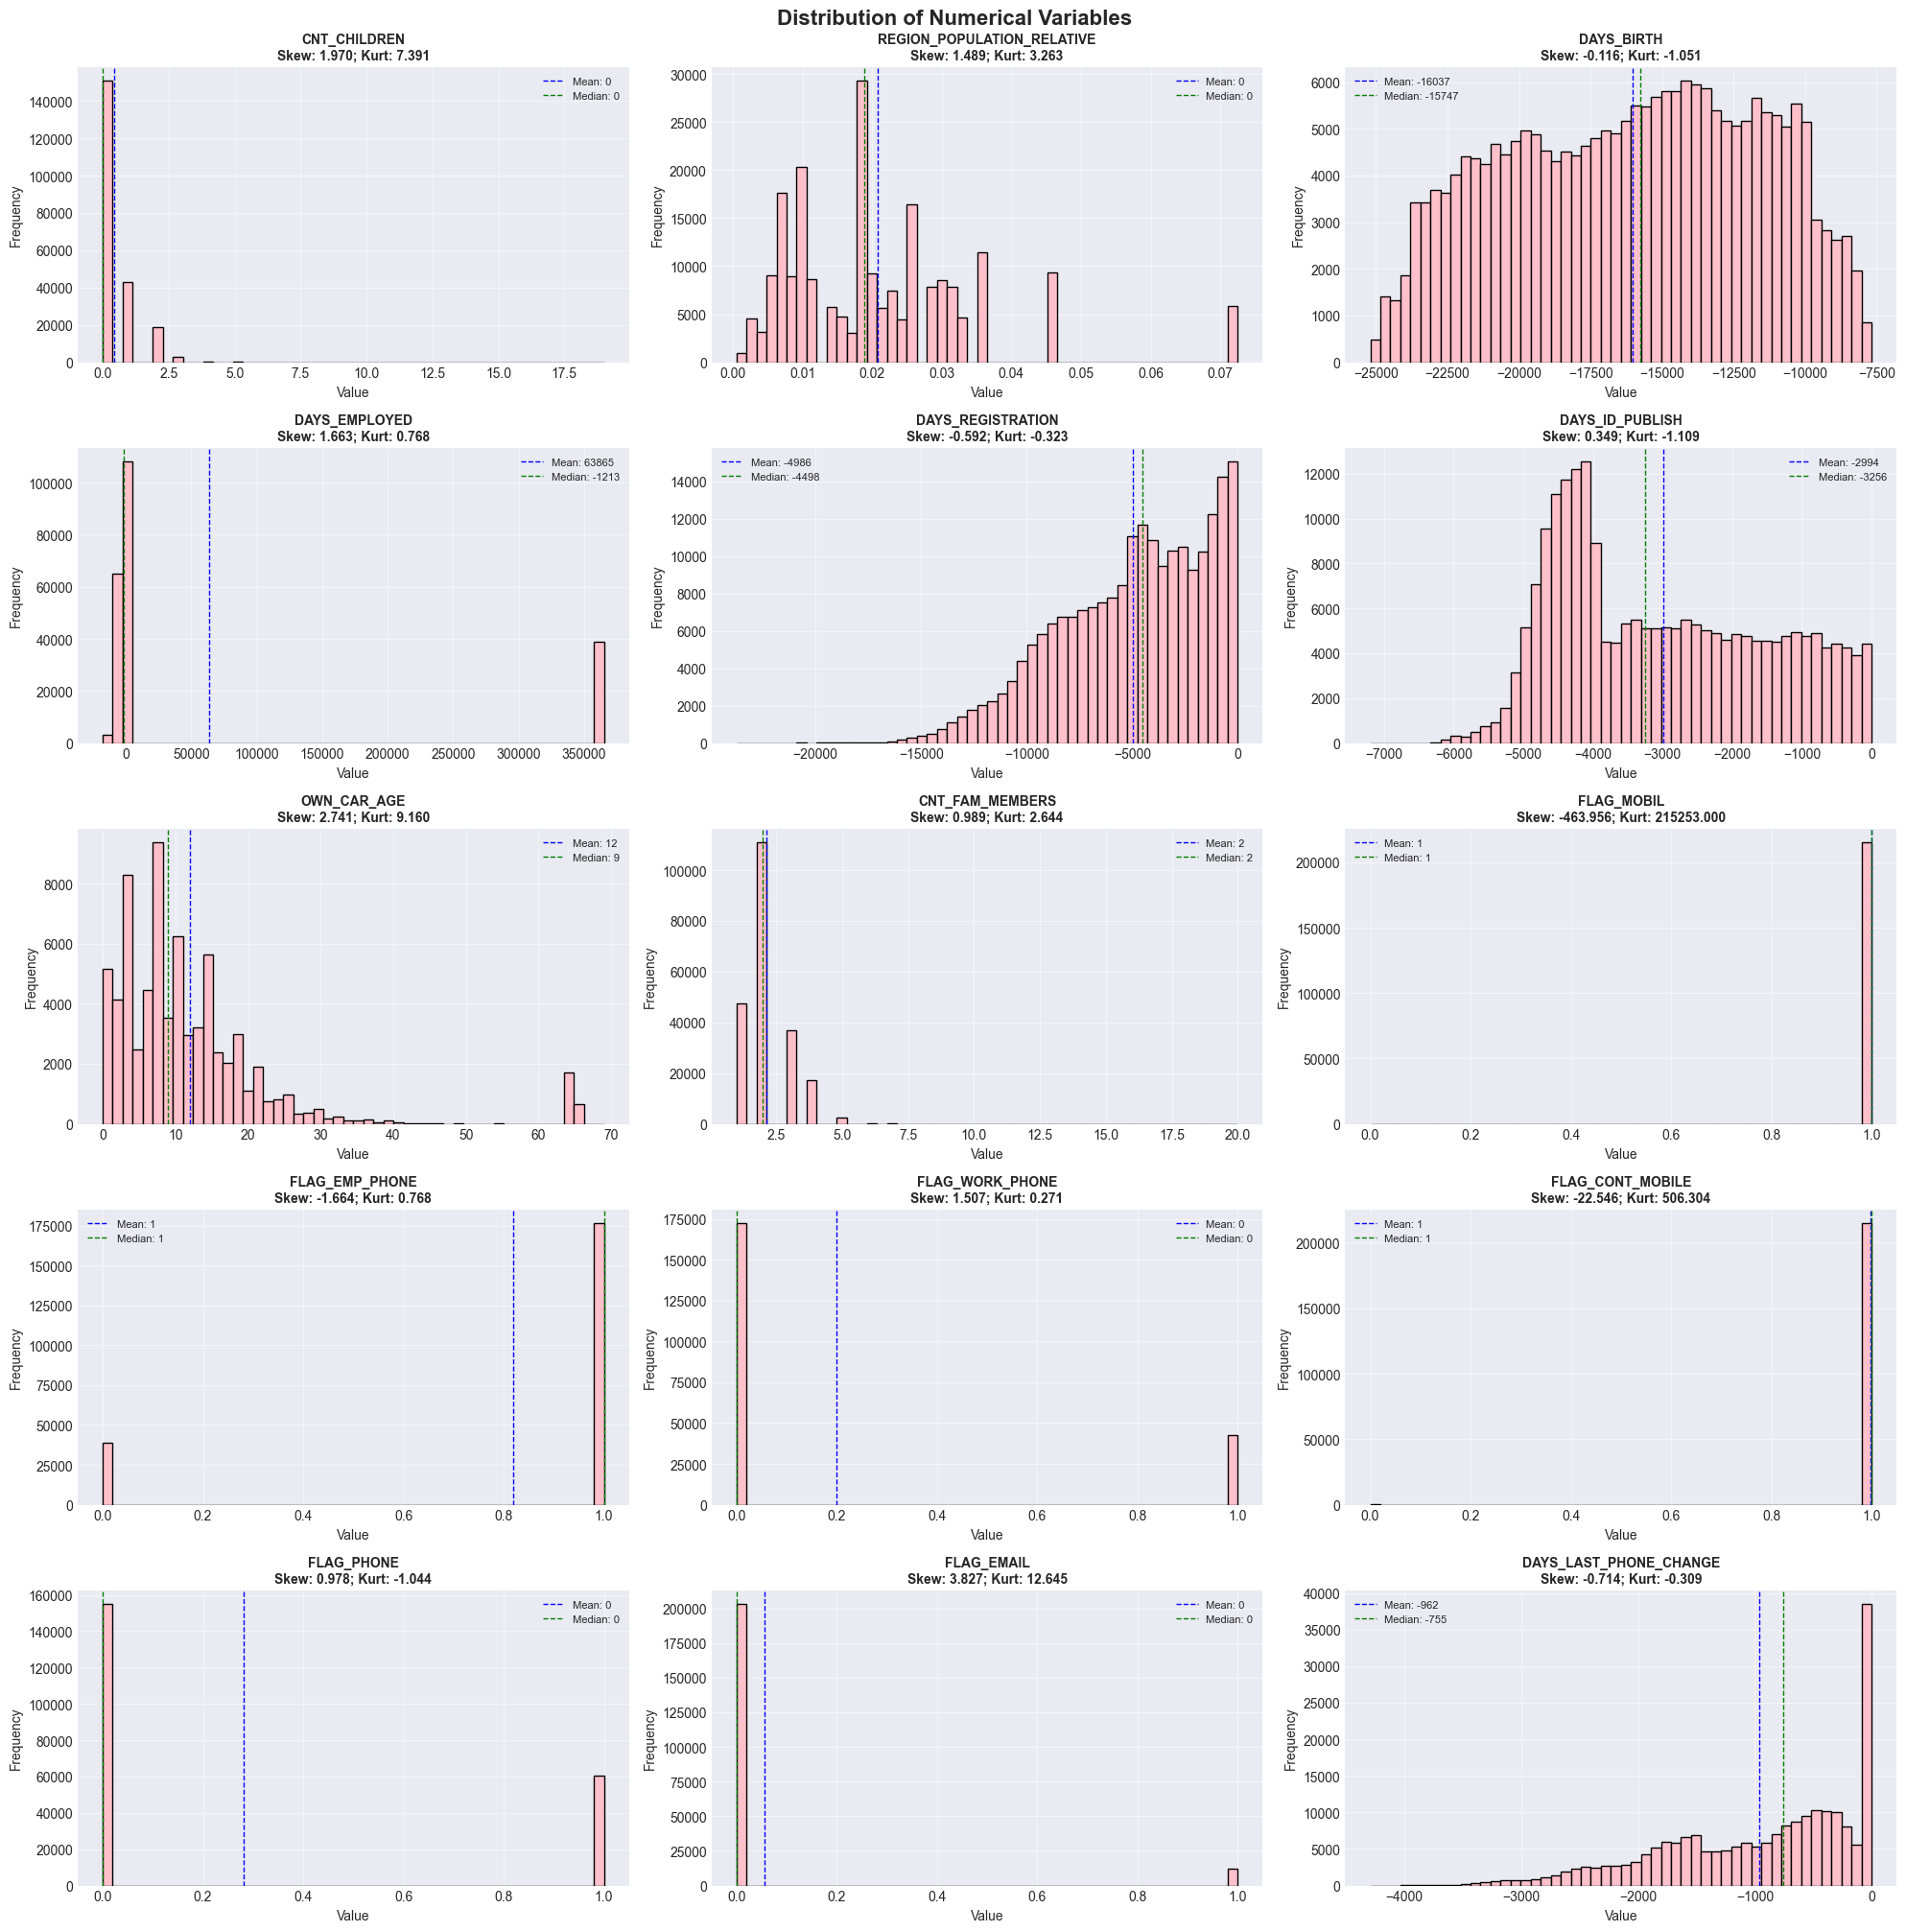

In [6]:
# Tạo histograms cho các biến numerical
n_cols = 3
n_rows = int(np.ceil(len(numerical_demo) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows*4))
axes = axes.flatten()

for idx, col in enumerate(numerical_demo):
    data = df[col].dropna()
    
    axes[idx].hist(data, bins=50, edgecolor='black', alpha=1, color='pink')
    axes[idx].set_title(f'{col}\nSkew: {stats.skew(data):.3f}; Kurt: {stats.kurtosis(data):.3f}', fontsize=10, fontweight='bold')
    axes[idx].set_xlabel('Value')
    axes[idx].set_ylabel('Frequency')
    axes[idx].grid(alpha=0.5)
    
    # Thêm đường thẳng mean và median
    axes[idx].axvline(data.mean(), color='blue', linestyle='--', linewidth=1, label=f'Mean: {data.mean():.0f}')
    axes[idx].axvline(data.median(), color='green', linestyle='--', linewidth=1, label=f'Median: {data.median():.0f}')
    axes[idx].legend(fontsize=8)

for idx in range(len(numerical_demo), len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.suptitle('Distribution of Numerical Variables', y=1.005, fontsize=16, fontweight='bold')
plt.show()

In [59]:
# Phân phối các biến categorical
for col in categorical_demo:
    value_counts = df[col].value_counts(dropna=False)
    pct = (df[col].value_counts(normalize=True, dropna=False) * 100).round(2)
    print(f"{col}:")
    
    
    
    cat_df = pd.DataFrame({
        'Category': value_counts.index,
        'Count': value_counts.values,
        'Percentage': pct.values
    })
    
    display(cat_df)

CODE_GENDER:


,Category,Count,Percentage
0,F,141571,65.77
1,M,73683,34.23
2,XNA,4,0.00


FLAG_OWN_CAR:


,Category,Count,Percentage
0,N,142102,66.01
1,Y,73156,33.99


FLAG_OWN_REALTY:


,Category,Count,Percentage
0,Y,149270,69.34
1,N,65988,30.66


NAME_INCOME_TYPE:


,Category,Count,Percentage
0,Working,111204,51.66
1,Commercial associate,50132,23.29
2,Pensioner,38780,18.02
3,State servant,15101,7.02
4,Unemployed,18,0.01
5,Student,14,0.01
6,Businessman,7,0.00
7,Maternity leave,2,0.00


NAME_EDUCATION_TYPE:


,Category,Count,Percentage
0,Secondary / secondary special,152933,71.05
1,Higher education,52389,24.34
2,Incomplete higher,7164,3.33
3,Lower secondary,2656,1.23
4,Academic degree,116,0.05


NAME_FAMILY_STATUS:


,Category,Count,Percentage
0,Married,137714,63.98
1,Single / not married,31692,14.72
2,Civil marriage,20775,9.65
3,Separated,13834,6.43
4,Widow,11241,5.22
5,Unknown,2,0.00


NAME_HOUSING_TYPE:


,Category,Count,Percentage
0,House / apartment,191154,88.80
1,With parents,10321,4.79
2,Municipal apartment,7798,3.62
3,Rented apartment,3371,1.57
4,Office apartment,1831,0.85
5,Co-op apartment,783,0.36


OCCUPATION_TYPE:


,Category,Count,Percentage
0,NaN,67664,31.43
1,Laborers,38656,17.96
2,Sales staff,22337,10.38
3,Core staff,19349,8.99
4,Managers,14899,6.92
5,Drivers,12997,6.04
6,High skill tech staff,7900,3.67
7,Accountants,6914,3.21
8,Medicine staff,6002,2.79
9,Security staff,4738,2.20


ORGANIZATION_TYPE:


,Category,Count,Percentage
0,Business Entity Type 3,47863,22.24
1,XNA,38790,18.02
2,Self-employed,26697,12.40
3,Other,11671,5.42
4,Medicine,7859,3.65
5,Business Entity Type 2,7397,3.44
6,Government,7254,3.37
7,School,6235,2.90
8,Trade: type 7,5440,2.53
9,Kindergarten,4821,2.24


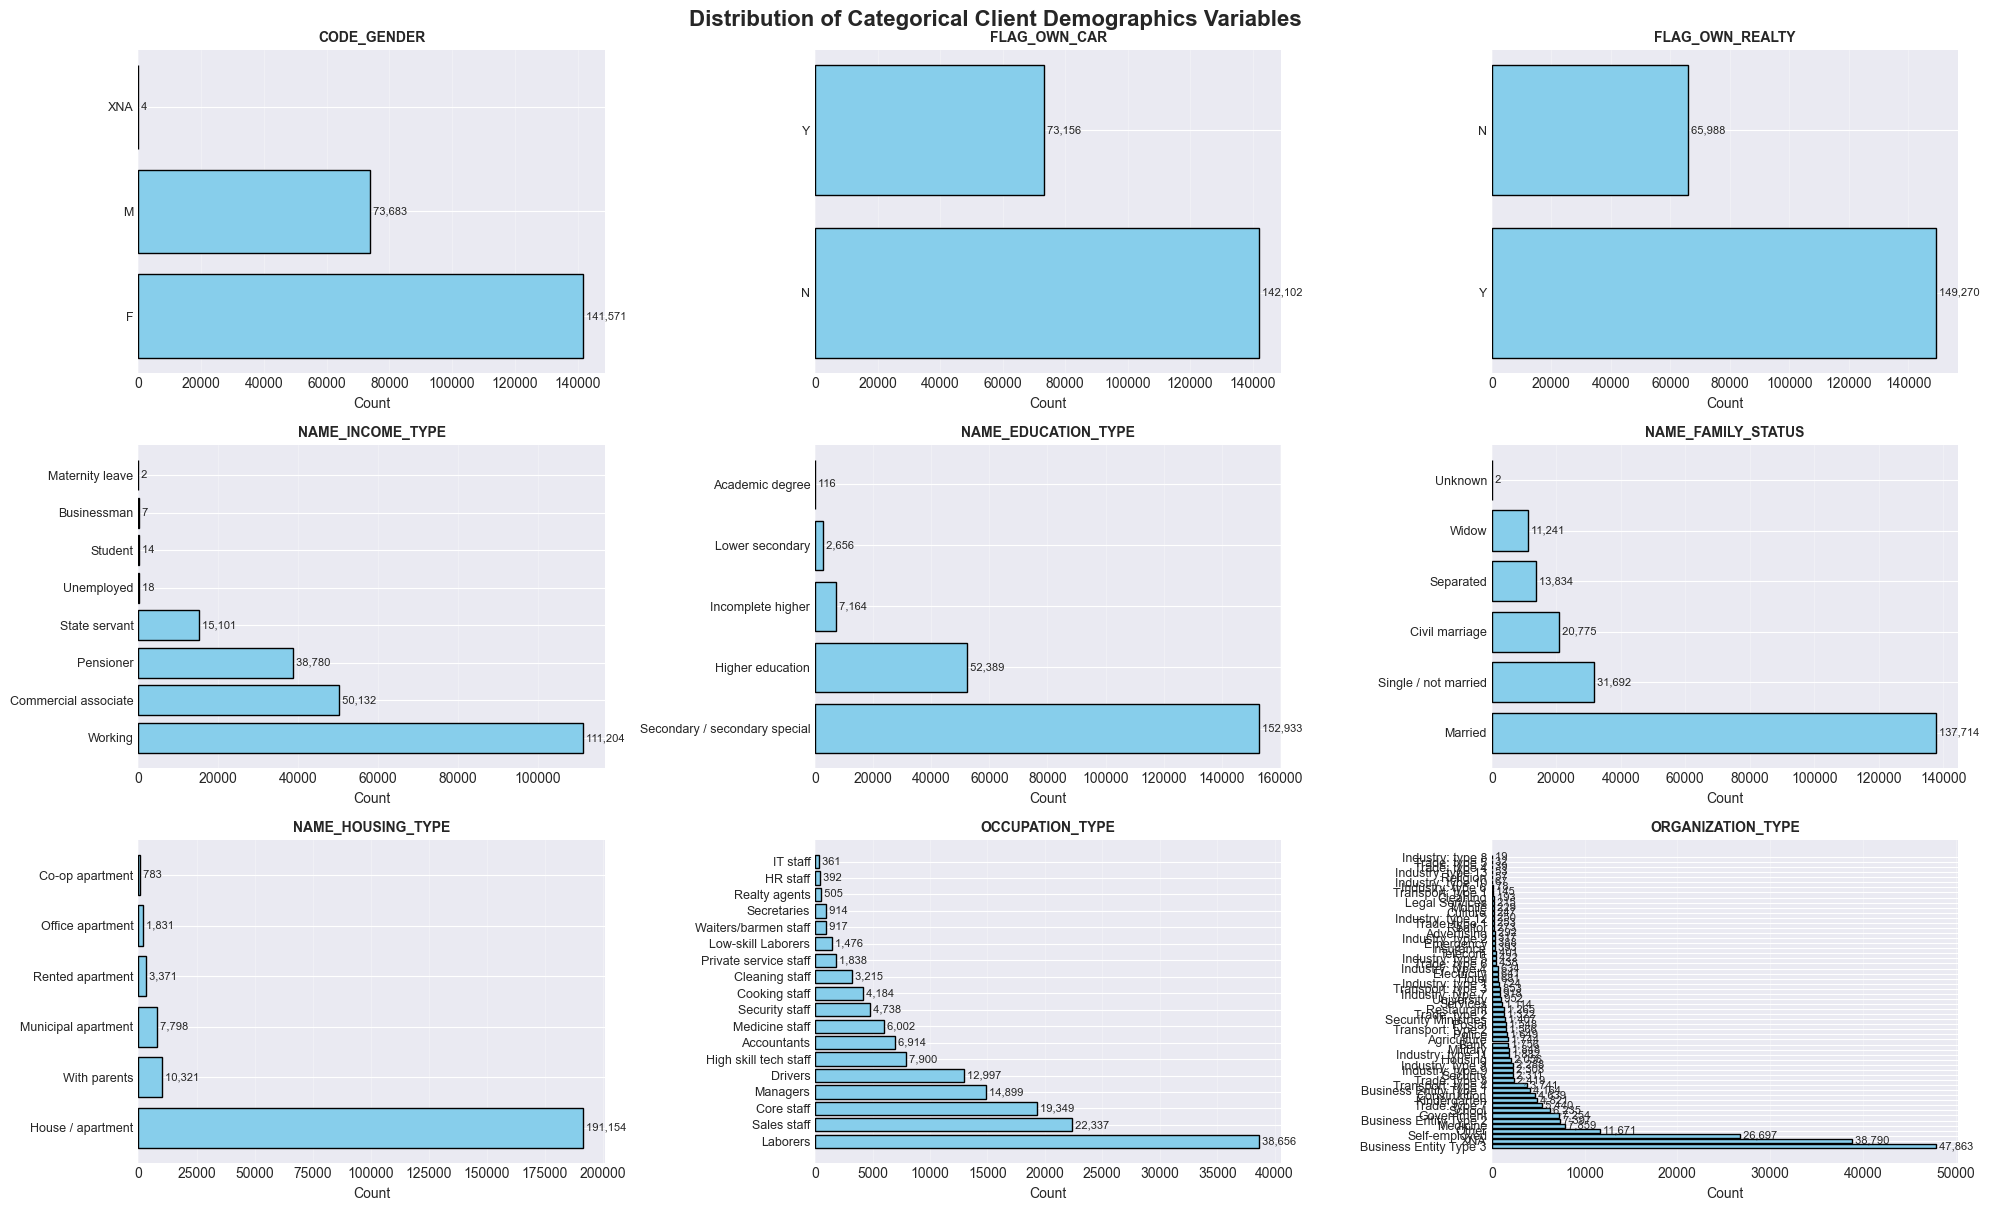

In [60]:
# Vẽ bảng phân phối các biến categorical
n_cat_vars = len(categorical_demo)
n_cols = 3
n_rows = int(np.ceil(n_cat_vars / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows*4))
axes = axes.flatten()

for idx, col in enumerate(categorical_demo):
    value_counts = df[col].value_counts()
    
    axes[idx].barh(range(len(value_counts)), value_counts.values, color='skyblue', edgecolor='black')
    axes[idx].set_yticks(range(len(value_counts)))
    axes[idx].set_yticklabels(value_counts.index, fontsize=9)
    axes[idx].set_xlabel('Count', fontsize=10)
    axes[idx].set_title(f'{col}', fontsize=10, fontweight='bold')
    axes[idx].grid(alpha=0.3, axis='x')
    
    for i, v in enumerate(value_counts.values):
        axes[idx].text(v, i, f' {v:,}', va='center', fontsize=8)

# Hide empty subplots
for idx in range(n_cat_vars, len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.suptitle('Distribution of Categorical Client Demographics Variables', y=1.005, fontsize=16, fontweight='bold')
plt.show()

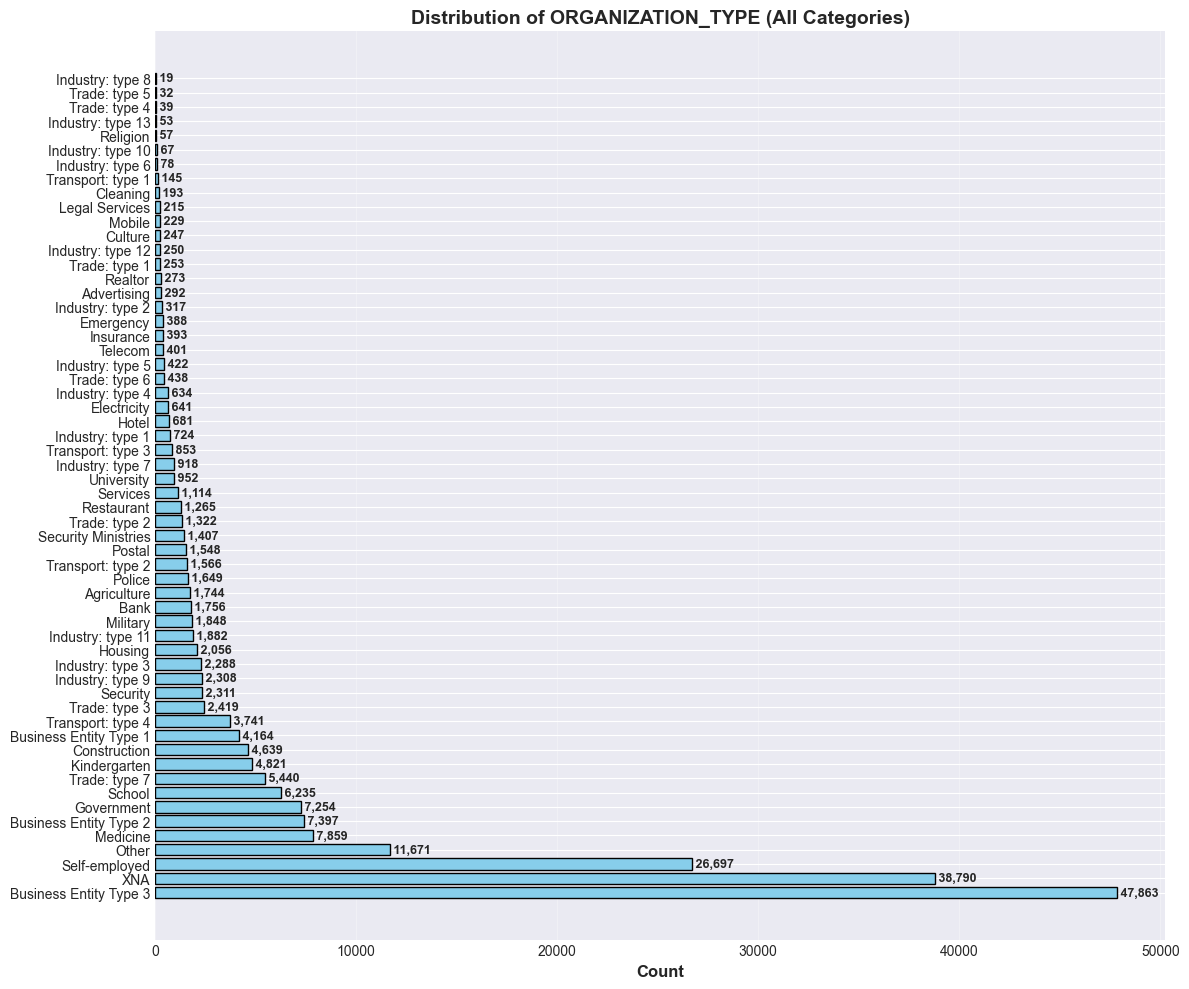

In [64]:
# ORGANIZATION_TYPE phân tích chi tiết
org_counts = df['ORGANIZATION_TYPE'].value_counts()
org_pct = (df['ORGANIZATION_TYPE'].value_counts(normalize=True) * 100).round(2)
org_df = pd.DataFrame({
    'Organization_Type': org_counts.index,
    'Count': org_counts.values,
    'Percentage': org_pct.values
})

fig, ax = plt.subplots(figsize=(12, 10))

colors_list = plt.cm.Set3(np.linspace(0, 1, len(org_df)))
ax.barh(range(len(org_df)), org_df['Count'], color='skyblue', edgecolor='black')
ax.set_yticks(range(len(org_df)))
ax.set_yticklabels(org_df['Organization_Type'], fontsize=10)
ax.set_xlabel('Count', fontsize=12, fontweight='bold')
ax.set_title('Distribution of ORGANIZATION_TYPE (All Categories)', fontsize=14, fontweight='bold')
ax.grid(alpha=0.3, axis='x')

for i, count in enumerate(org_df['Count']):
    ax.text(count, i, f' {count:,}', va='center', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()


## **Missing Data Analysis**

### **Missing Data Types:**
- **MCAR (Missing Completely At Random)**: Missing values are randomly distributed, unrelated to any variable
- **MAR (Missing At Random)**: Missing values depend on observed data but not on the missing values themselves
- **MNAR (Missing Not At Random)**: Missing values depend on unobserved data or the missing value itself

In [ ]:
missing_stats = []
for col in client_demo_cols:
    missing_count = df[col].isnull().sum()
    missing_pct = (missing_count / len(df)) * 100
    
    if missing_count > 0:
        missing_stats.append({
            'Variable': col,
            'Missing_Count': missing_count,
            'Missing_Percentage': missing_pct,
            'Present_Count': len(df) - missing_count,
            'Data_Type': df[col].dtype
        })

missing_df = pd.DataFrame(missing_stats).sort_values('Missing_Percentage', ascending=False)

# Phân threshold
missing_df['Severity'] = missing_df['Missing_Percentage'].apply(
    lambda x: 'Should drop (>70%)' if x > 70 else (
        'High (40-70%)' if x > 40 else (
            'Moderate (10-40%)' if x > 10 else 'Low (<10%)'
        )
    )
)

print(f"Total variables with missing data: {len(missing_df)}/{len(client_demo_cols)}")

severity_summary = missing_df.groupby('Severity').agg({
    'Variable': 'count' })
print(severity_summary)

Total variables with missing data: 4/24
                   Variable
Severity                   
High (40-70%)             1
Low (<10%)                2
Moderate (10-40%)         1


In [84]:
missing_df

,Variable,Missing_Count,Missing_Percentage,Present_Count,Data_Type,Severity
0,OWN_CAR_AGE,142104,66.015665,73154,float64,High (40-70%)
1,OCCUPATION_TYPE,67664,31.433907,147594,object,Moderate (10-40%)
2,CNT_FAM_MEMBERS,2,0.000929,215256,float64,Low (<10%)
3,DAYS_LAST_PHONE_CHANGE,1,0.000465,215257,float64,Low (<10%)


Phần này t nghĩ cái OWN_CAR_AGE và OCCUPATION_TYPE không nên drop vì client có thể không / chưa có xe hoặc đang thất nghiệp / đang ở độ tuổi tìm việc làm. 

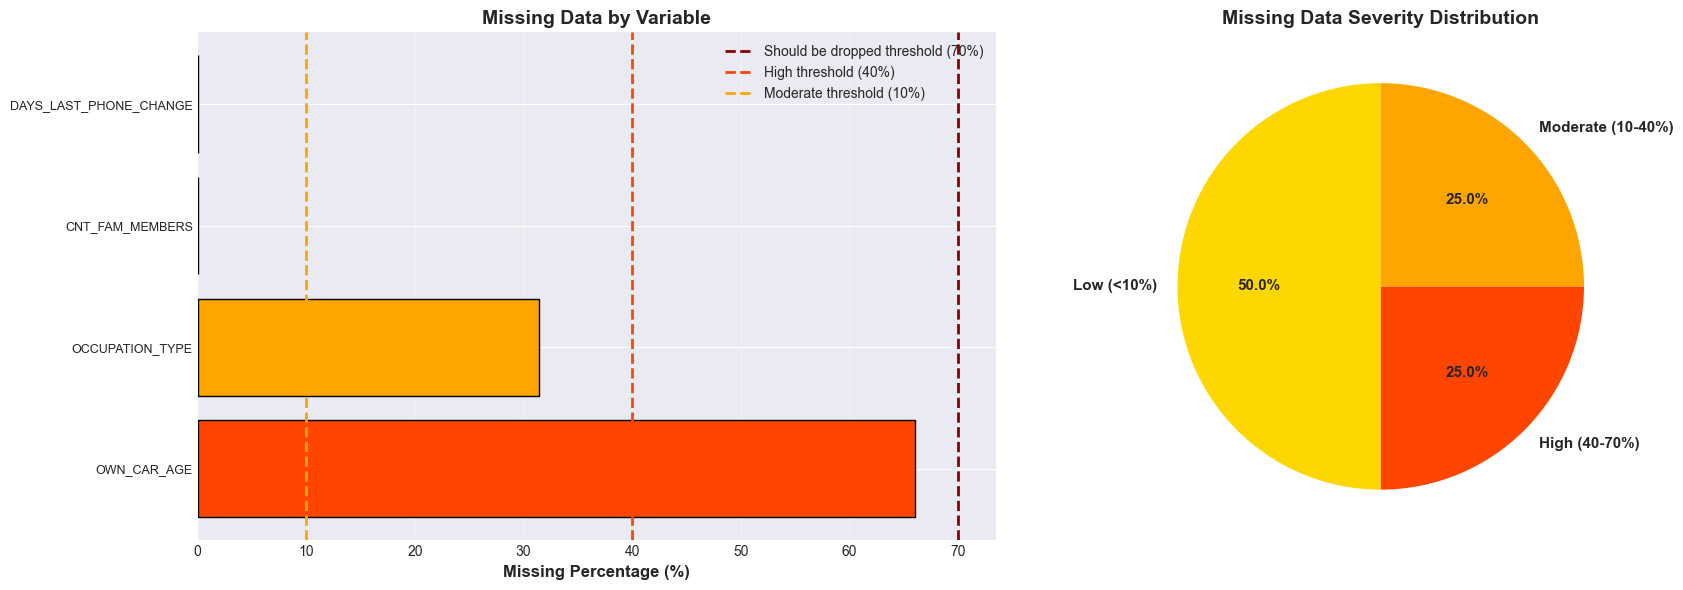

In [82]:
# Vẽ bảng xem missing data
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

if len(missing_df) > 0:
    colors = missing_df['Severity'].map({
        'Should drop (>70%)': 'darkred',
        'High (40-70%)': 'orangered',
        'Moderate (10-40%)': 'orange',
        'Low (<10%)': 'gold'
    })
    
    axes[0].barh(range(len(missing_df)), missing_df['Missing_Percentage'], color=colors, edgecolor='black')
    axes[0].set_yticks(range(len(missing_df)))
    axes[0].set_yticklabels(missing_df['Variable'], fontsize=9)
    axes[0].set_xlabel('Missing Percentage (%)', fontsize=12, fontweight='bold')
    axes[0].set_title('Missing Data by Variable', fontsize=14, fontweight='bold')
    axes[0].grid(alpha=0.3, axis='x')
    axes[0].axvline(70, color='darkred', linestyle='--', linewidth=2, label='Should be dropped threshold (70%)')
    axes[0].axvline(40, color='orangered', linestyle='--', linewidth=2, label='High threshold (40%)')
    axes[0].axvline(10, color='orange', linestyle='--', linewidth=2, label='Moderate threshold (10%)')
    axes[0].legend()
    
    # Bảng pie chart phân loại có nên drop missing values hay ko
    severity_counts = missing_df['Severity'].value_counts()
    colors_pie = ['darkred' if 'Should drop' in s else 'orangered' if 'High' in s else 'orange' if 'Moderate' in s else 'gold' for s in severity_counts.index]
    
    axes[1].pie(severity_counts.values, labels=severity_counts.index, autopct='%1.1f%%',
                colors=colors_pie, startangle=90, textprops={'fontsize': 11, 'fontweight': 'bold'})
    axes[1].set_title('Missing Data Severity Distribution', fontsize=14, fontweight='bold')
else:
    axes[0].text(0.5, 0.5, 'No Missing Data Found!', ha='center', va='center', fontsize=20)
    axes[0].axis('off')
    axes[1].axis('off')

plt.tight_layout()
plt.show()

### Phân loại missing value vs cách xử lý
* OWN_CAR_AGE: Loại .. vì như đã nói ở trên, có thể chỉ do người ta ko có xe hoặc chưa có tiền mua xe hoặc đại loại như v.
&rarr; Tạo binary has_car hoặc là dùng cái FLAG_OWN_CAR

* OCCUPATION_TYPE: Loại MAR ( hoặc MNAR đoán thế), chắc sẽ liên quan đến cái DAYS_EMPLOYED vs NAME_INCOME_TYPE
&rarr; tao đang ko biết xử lý thế nào

* CNT_FAM_MEMBERS: Loại MCAR ?, có thể do người ta ko có người thân thật, hoặc do vấn đề gì đó mà họ không có gia đình ;-; 
&rarr; Mode imputation hoặc median imputation
* DAYS_LAST_PHONE_CHANGE: Loại MCAR (Missing Completely At Random)', có thể là do ngta ko thích đổi số điện thoại thì s
&rarr; Mode imputation hoặc median imputation.


Phần này xem drop hay ko thì qutrong cái mối quan hệ vs các biến khác và vs TARGET của mình nx
    


## **Outlier Detection & Analysis**

In [ ]:
# IQR
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound, IQR

# Z-Score
def detect_outliers_zscore(data, column, threshold=3):
    mean = data[column].mean()
    std = data[column].std()
    z_scores = np.abs((data[column] - mean) / std)
    outliers = data[z_scores > threshold]
    return outliers

# Phân tích outlier của numerical
outlier_summary = []

for col in numerical_demo:
    data_clean = df[df[col].notna()]
    
    if len(data_clean) > 0:
        # IQR method
        outliers_iqr, lower, upper, iqr = detect_outliers_iqr(data_clean, col)
        
        # Z-score method
        outliers_z = detect_outliers_zscore(data_clean, col, threshold=3)
        
        outlier_summary.append({
            'Variable': col,
            'Total_Records': len(data_clean),
            'IQR_Outliers': len(outliers_iqr),
            'IQR_Outlier_Pct': (len(outliers_iqr) / len(data_clean)) * 100,
            'Z_Score_Outliers': len(outliers_z),
            'Z_Score_Outlier_Pct': (len(outliers_z) / len(data_clean)) * 100,
            'Lower_Bound': lower,
            'Upper_Bound': upper,
            'IQR': iqr
        })

outlier_df = pd.DataFrame(outlier_summary).sort_values('IQR_Outlier_Pct', ascending=False)

print("\nOUTLIER DETECTION SUMMARY (sorted by IQR outlier percentage)\n")
display(outlier_df.round(2))

# Biến có outlier cao
high_outlier_vars = outlier_df[outlier_df['IQR_Outlier_Pct'] > ....]['Variable'].tolist()

print(f"Variables with >....% outliers (IQR method): {len(high_outlier_vars)}")
print(f"{high_outlier_vars}")


OUTLIER DETECTION SUMMARY (sorted by IQR outlier percentage)



,Variable,Total_Records,IQR_Outliers,IQR_Outlier_Pct,Z_Score_Outliers,Z_Score_Outlier_Pct,Lower_Bound,Upper_Bound,IQR
3,DAYS_EMPLOYED,215258,50597,23.51,0,0.00,-6462.00,3418.00,2470.00
10,FLAG_WORK_PHONE,215258,42862,19.91,0,0.00,0.00,0.00,0.00
9,FLAG_EMP_PHONE,215258,38800,18.02,0,0.00,1.00,1.00,0.00
13,FLAG_EMAIL,215258,12241,5.69,12241,5.69,0.00,0.00,0.00
6,OWN_CAR_AGE,73154,3475,4.75,2371,3.24,-10.00,30.00,10.00
1,REGION_POPULATION_RELATIVE,215258,5899,2.74,5899,2.74,-0.02,0.06,0.02
0,CNT_CHILDREN,215258,3043,1.41,3043,1.41,-1.50,2.50,1.00
7,CNT_FAM_MEMBERS,215256,2855,1.33,2855,1.33,0.50,4.50,1.00
4,DAYS_REGISTRATION,215258,449,0.21,515,0.24,-15687.00,6201.00,5472.00
11,FLAG_CONT_MOBILE,215258,421,0.20,421,0.20,1.00,1.00,0.00


Variables with >5% outliers (IQR method): 4
['DAYS_EMPLOYED', 'FLAG_WORK_PHONE', 'FLAG_EMP_PHONE', 'FLAG_EMAIL']


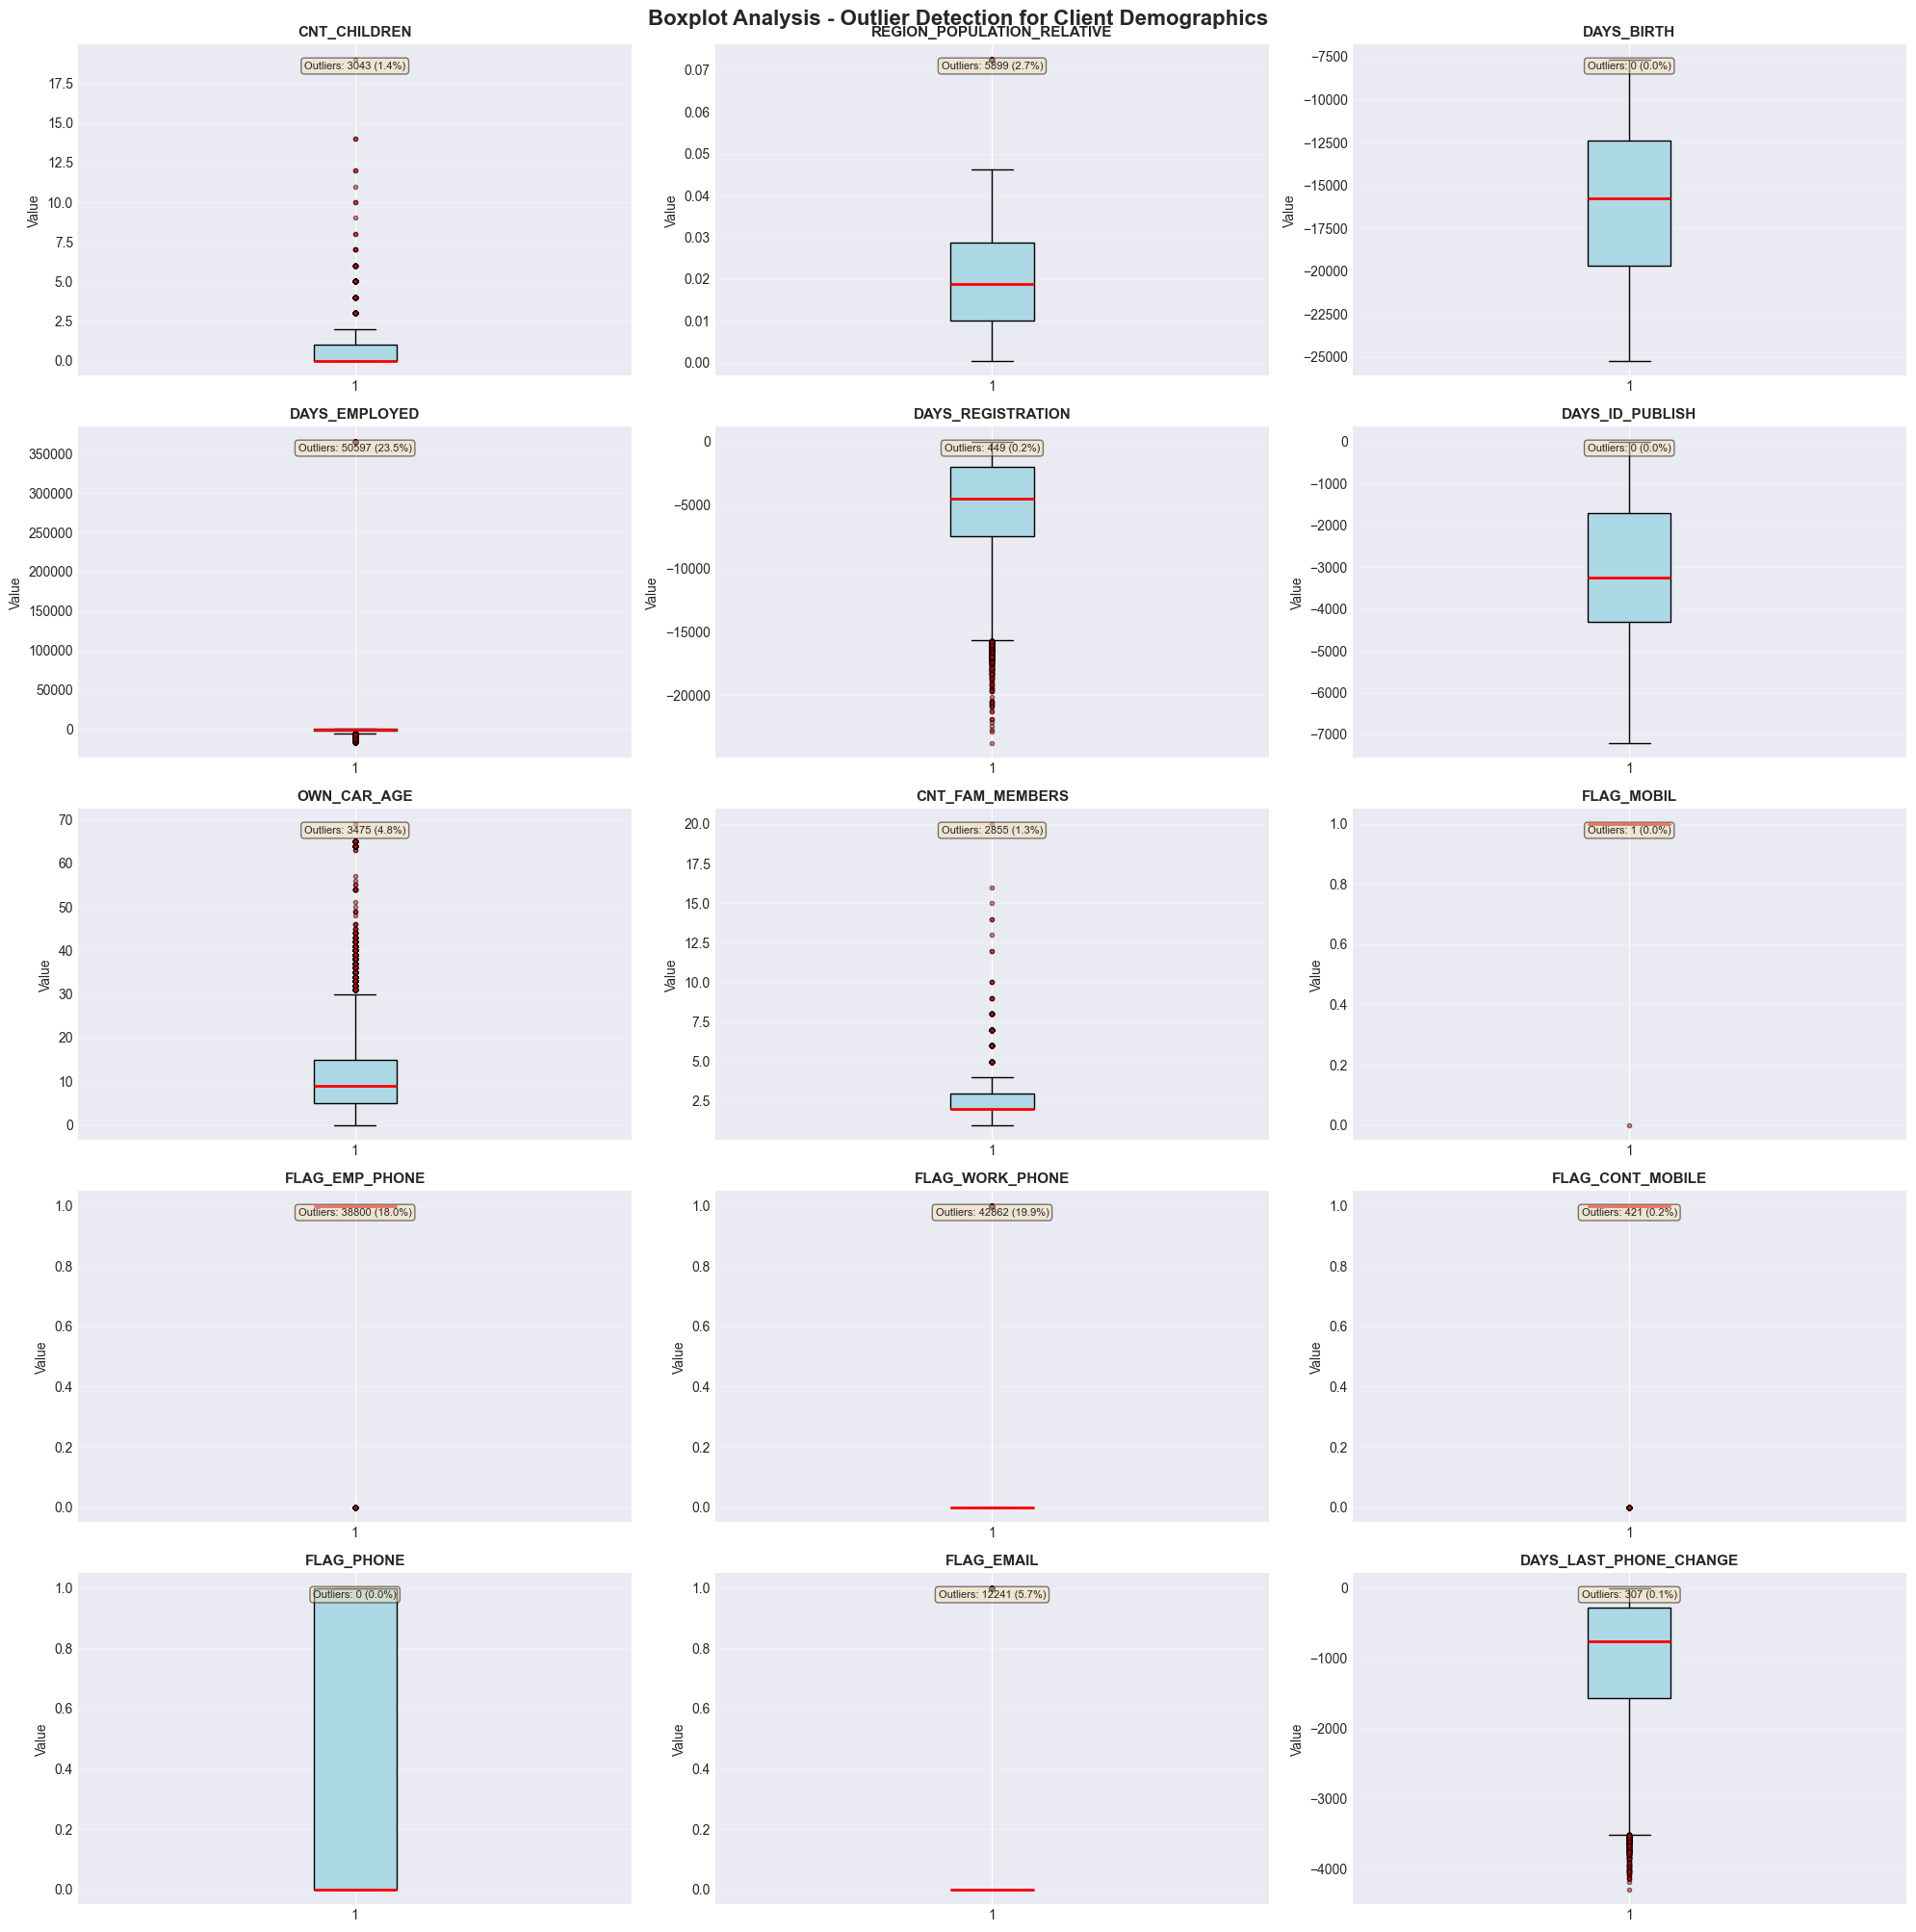

In [99]:
# Boxplot phân tích outlier
n_cols = 3
n_rows = int(np.ceil(len(numerical_demo) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows*4))
axes = axes.flatten()

for idx, col in enumerate(numerical_demo):
    data_clean = df[col].dropna()
    
    if len(data_clean) > 0:
        bp = axes[idx].boxplot(data_clean, vert=True, patch_artist=True,
                               boxprops=dict(facecolor='lightblue', color='black'),
                               whiskerprops=dict(color='black'),
                               capprops=dict(color='black'),
                               medianprops=dict(color='red', linewidth=2),
                               flierprops=dict(marker='o', markerfacecolor='red', markersize=3, alpha=0.5))
        
        axes[idx].set_ylabel('Value', fontsize=10)
        axes[idx].set_title(f'{col}', fontsize=11, fontweight='bold')
        axes[idx].grid(alpha=0.3, axis='y')
        
        # Statistics
        Q1 = data_clean.quantile(0.25)
        Q3 = data_clean.quantile(0.75)
        IQR = Q3 - Q1
        outlier_count = len(data_clean[(data_clean < Q1 - 1.5*IQR) | (data_clean > Q3 + 1.5*IQR)])
        outlier_pct = (outlier_count / len(data_clean)) * 100
        
        axes[idx].text(0.5, 0.95, f'Outliers: {outlier_count} ({outlier_pct:.1f}%)',
                      transform=axes[idx].transAxes, ha='center', va='top',
                      bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5),
                      fontsize=8)

for idx in range(len(numerical_demo), len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.suptitle('Boxplot Analysis - Outlier Detection for Client Demographics', y=1.001, fontsize=16, fontweight='bold')
plt.show()

Phần phân tích insights...

## **Relationship with Target Variable**

Target Variable Distribution:
Class 0 (No payment difficulty): 197,880 (91.93%)
Class 1 (Payment difficulty): 17,378 (8.07%)
Imbalance Ratio: 1:11.4


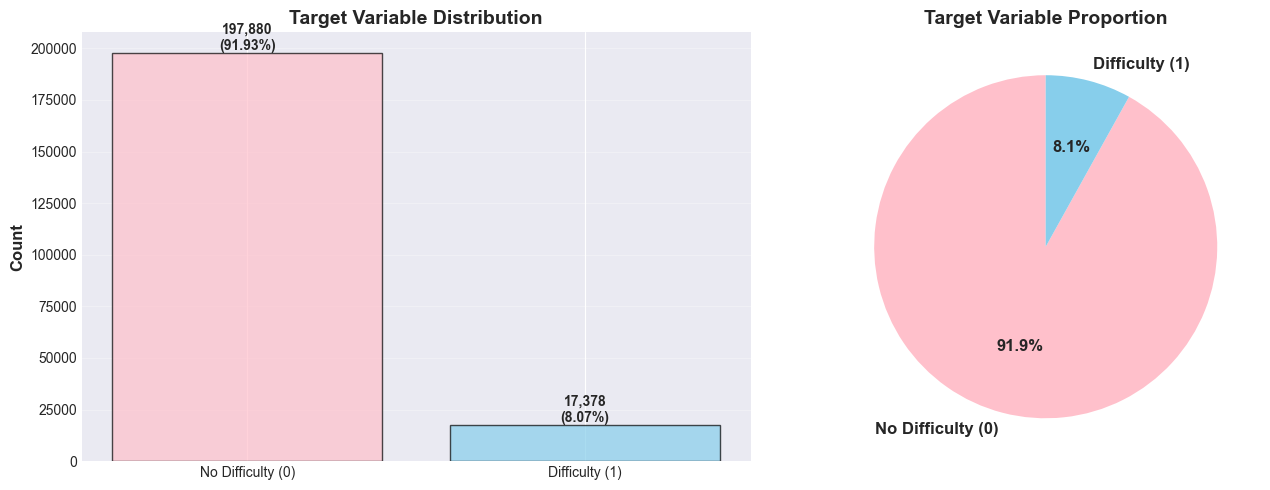

In [107]:
# Xem phân phối biến target của mình
target_dist = df['TARGET'].value_counts()
target_pct = (df['TARGET'].value_counts(normalize=True) * 100).round(2)

print(f"Target Variable Distribution:")
print(f"Class 0 (No payment difficulty): {target_dist[0]:,} ({target_pct[0]}%)")
print(f"Class 1 (Payment difficulty): {target_dist[1]:,} ({target_pct[1]}%)")
print(f"Imbalance Ratio: 1:{target_dist[0]/target_dist[1]:.1f}")

# Bảng :P
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bảng cột
axes[0].bar(['No Difficulty (0)', 'Difficulty (1)'], target_dist.values, 
           color=['pink', 'skyblue'], edgecolor='black', alpha=0.7)
axes[0].set_ylabel('Count', fontsize=12, fontweight='bold')
axes[0].set_title('Target Variable Distribution', fontsize=14, fontweight='bold')
axes[0].grid(alpha=0.3, axis='y')
for i, v in enumerate(target_dist.values):
    axes[0].text(i, v, f'{v:,}\n({target_pct.values[i]}%)', ha='center', va='bottom', fontweight='bold')

# Bảng bánh <3
axes[1].pie(target_dist.values, labels=['No Difficulty (0)', 'Difficulty (1)'], 
           autopct='%1.1f%%', colors=['pink', 'skyblue'], startangle=90,
           textprops={'fontsize': 12, 'fontweight': 'bold'})
axes[1].set_title('Target Variable Proportion', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

INSIGHTS...

Correlation with TARGET:


,Variable,Correlation,Abs_Correlation,Strength
2,DAYS_BIRTH,0.0778,0.0778,Weak
14,DAYS_LAST_PHONE_CHANGE,0.0544,0.0544,Weak
5,DAYS_ID_PUBLISH,0.0526,0.0526,Weak
9,FLAG_EMP_PHONE,0.0452,0.0452,Weak
3,DAYS_EMPLOYED,-0.0442,0.0442,Weak
6,OWN_CAR_AGE,0.0411,0.0411,Weak
4,DAYS_REGISTRATION,0.0408,0.0408,Weak
1,REGION_POPULATION_RELATIVE,-0.0377,0.0377,Weak
10,FLAG_WORK_PHONE,0.0275,0.0275,Weak
12,FLAG_PHONE,-0.0253,0.0253,Weak


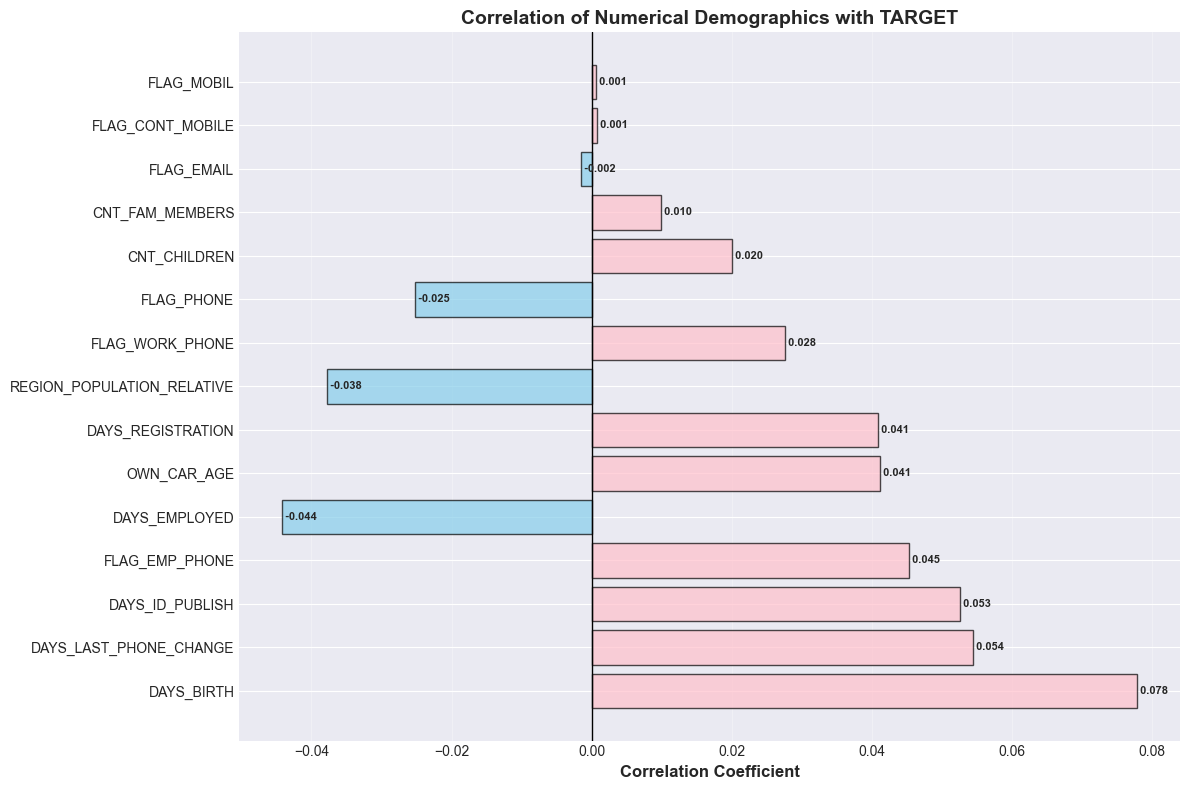

In [113]:
# Corr của biến TARGET vs các cột numerical
target_corr = []
for col in numerical_demo:
    if col in df.columns:
        corr = df[col].corr(df['TARGET'])
        target_corr.append({
            'Variable': col,
            'Correlation': corr,
            'Abs_Correlation': abs(corr)
        })

corr_df = pd.DataFrame(target_corr).sort_values('Abs_Correlation', ascending=False)
corr_df['Strength'] = corr_df['Abs_Correlation'].apply(
    lambda x: 'Strong' if x > 0.3 else ('Moderate' if x > 0.1 else 'Weak')
)

print("Correlation with TARGET:")
display(corr_df.round(4))

# Lại là vẽ bảng
fig, ax = plt.subplots(figsize=(12, 8))

colors = ['pink' if x > 0 else 'skyblue' for x in corr_df['Correlation']]
bars = ax.barh(range(len(corr_df)), corr_df['Correlation'], color=colors, edgecolor='black', alpha=0.7)

ax.set_yticks(range(len(corr_df)))
ax.set_yticklabels(corr_df['Variable'], fontsize=10)
ax.set_xlabel('Correlation Coefficient', fontsize=12, fontweight='bold')
ax.set_title('Correlation of Numerical Demographics with TARGET', fontsize=14, fontweight='bold')
ax.axvline(0, color='black', linewidth=1)
ax.grid(alpha=0.3, axis='x')

for i, (idx, row) in enumerate(corr_df.iterrows()):
    value = row['Correlation']
    ax.text(value, i, f' {value:.3f}', va='center', fontsize=8, fontweight='bold')

plt.tight_layout()
plt.show()

Tương quan dương → Rủi ro khách hàng sủi nợ cao hơn\
Tương quan âm → Rủi ro khách hàng sủi nợ thấp hơn


                                   CATEGORICAL FEATURES vs TARGET                                   
CODE_GENDER vs TARGET


,Category,Total_Count,No_Difficulty,Has_Difficulty,Default_Rate_%
CODE_GENDER,,,,,
M,M,73683,66227,7456,10.12
F,F,141571,131649,9922,7.01
XNA,XNA,4,4,0,0.00


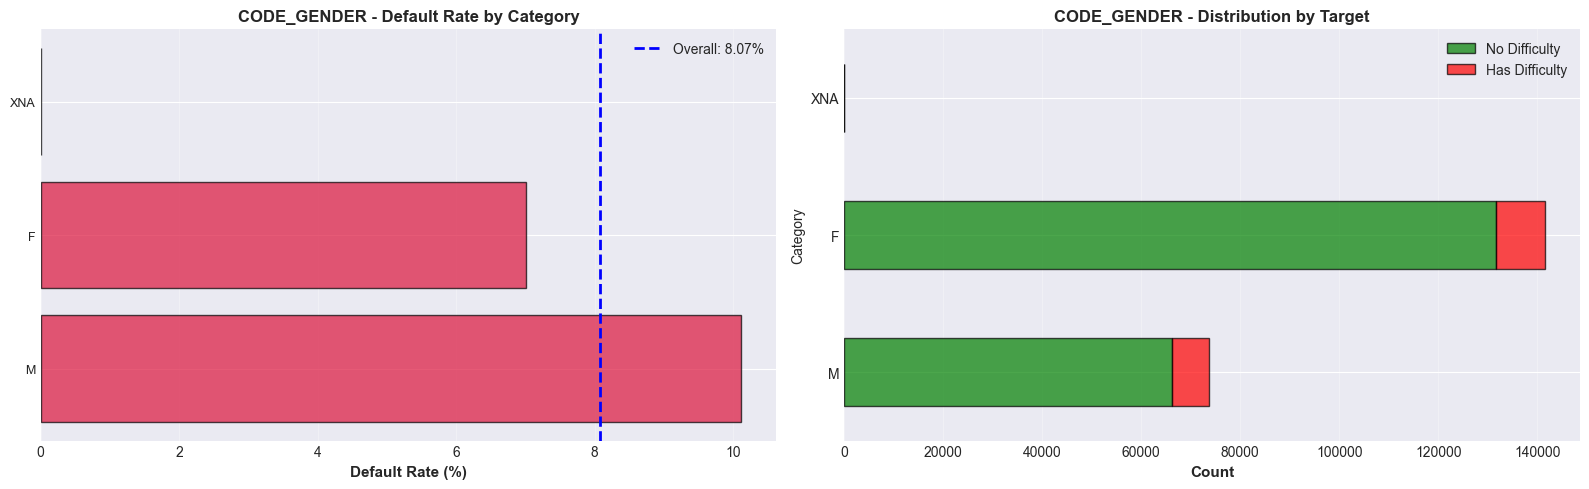



FLAG_OWN_CAR vs TARGET


,Category,Total_Count,No_Difficulty,Has_Difficulty,Default_Rate_%
FLAG_OWN_CAR,,,,,
N,N,142102,130020,12082,8.50
Y,Y,73156,67860,5296,7.24


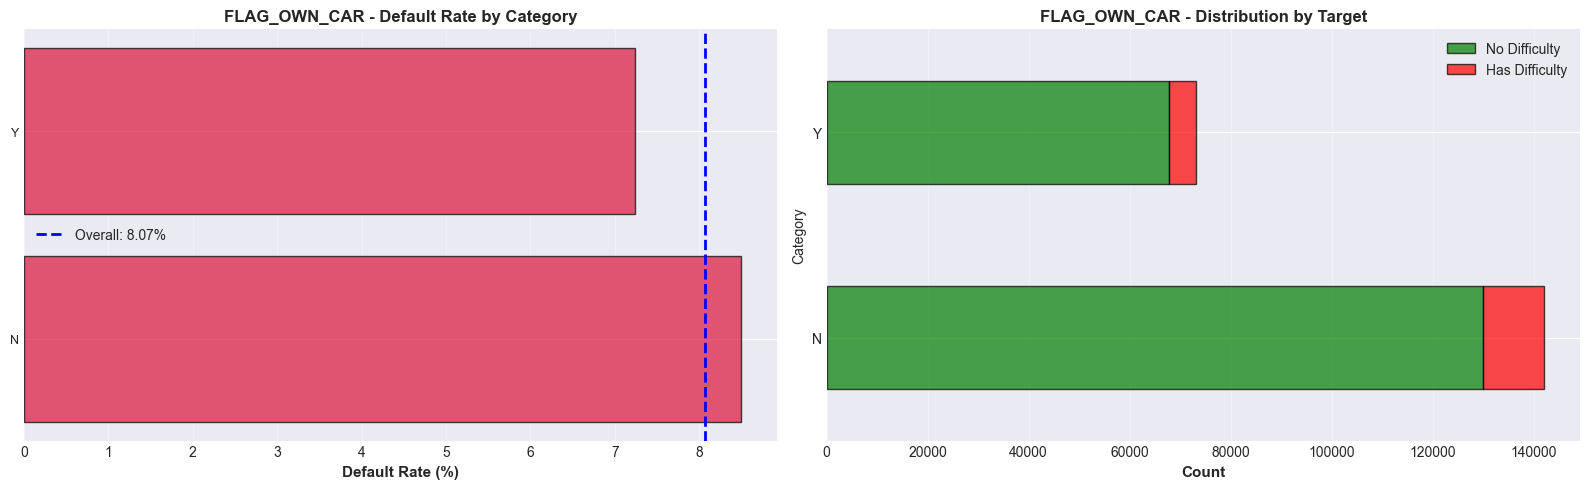



FLAG_OWN_REALTY vs TARGET


,Category,Total_Count,No_Difficulty,Has_Difficulty,Default_Rate_%
FLAG_OWN_REALTY,,,,,
N,N,65988,60496,5492,8.32
Y,Y,149270,137384,11886,7.96


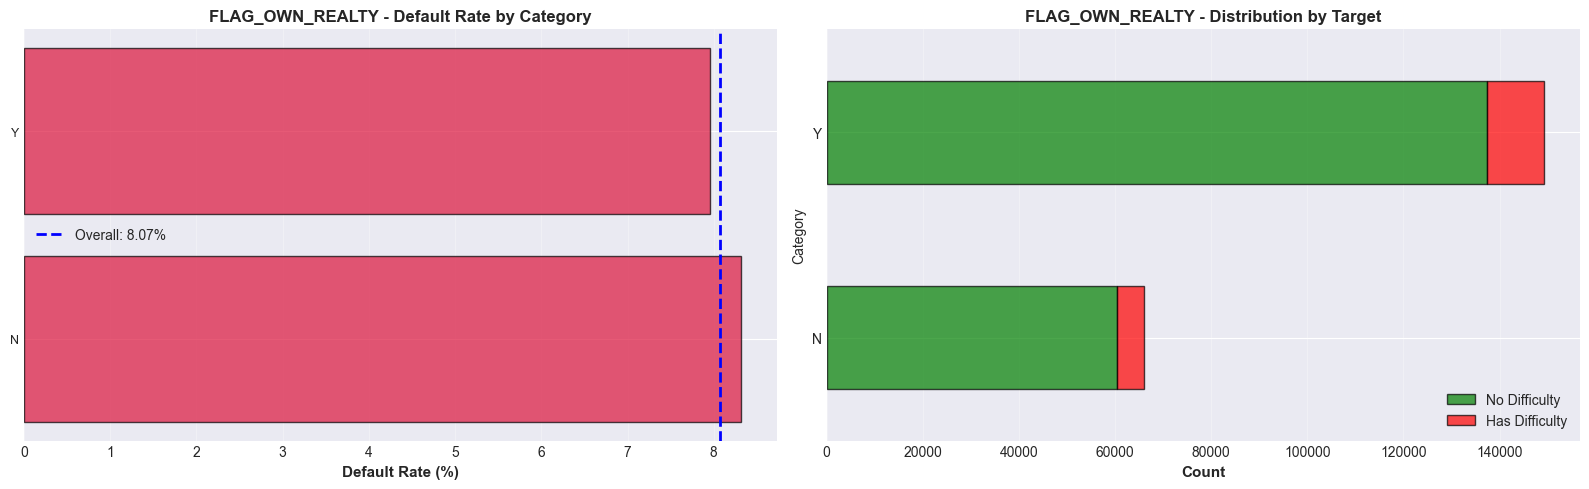



NAME_INCOME_TYPE vs TARGET


,Category,Total_Count,No_Difficulty,Has_Difficulty,Default_Rate_%
NAME_INCOME_TYPE,,,,,
Unemployed,Unemployed,18,12,6,33.33
Working,Working,111204,100573,10631,9.56
Commercial associate,Commercial associate,50132,46388,3744,7.47
State servant,State servant,15101,14210,891,5.90
Pensioner,Pensioner,38780,36674,2106,5.43
Businessman,Businessman,7,7,0,0.00
Maternity leave,Maternity leave,2,2,0,0.00
Student,Student,14,14,0,0.00


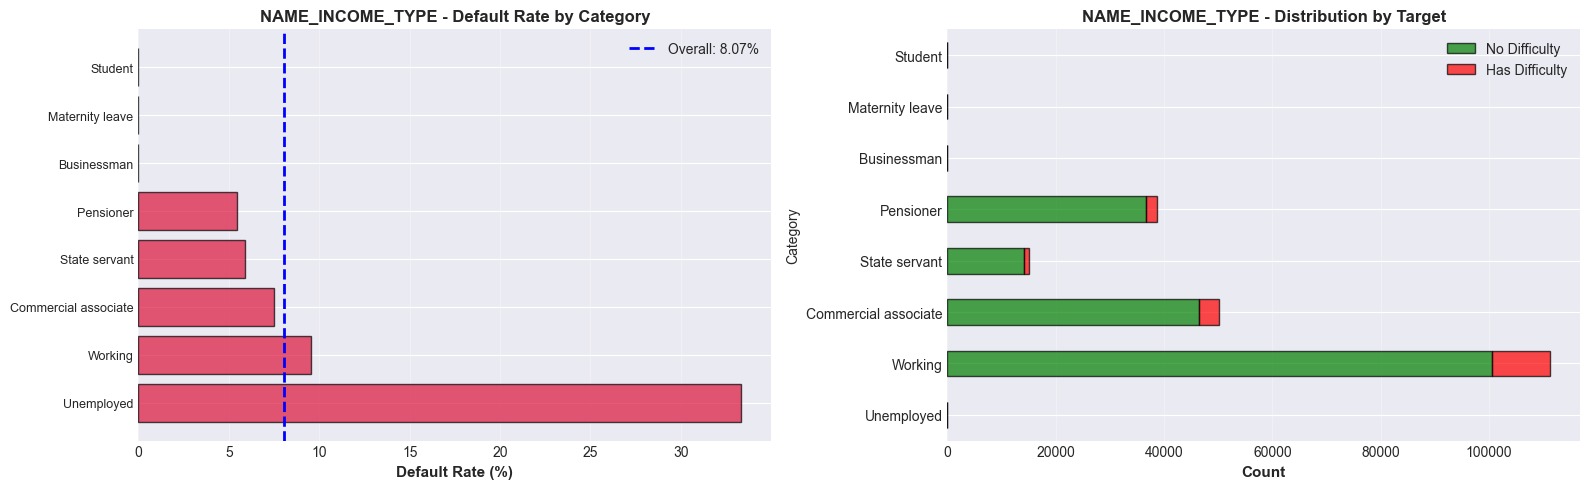



NAME_EDUCATION_TYPE vs TARGET


,Category,Total_Count,No_Difficulty,Has_Difficulty,Default_Rate_%
NAME_EDUCATION_TYPE,,,,,
Lower secondary,Lower secondary,2656,2353,303,11.41
Secondary / secondary special,Secondary / secondary special,152933,139269,13664,8.93
Incomplete higher,Incomplete higher,7164,6562,602,8.40
Higher education,Higher education,52389,49583,2806,5.36
Academic degree,Academic degree,116,113,3,2.59


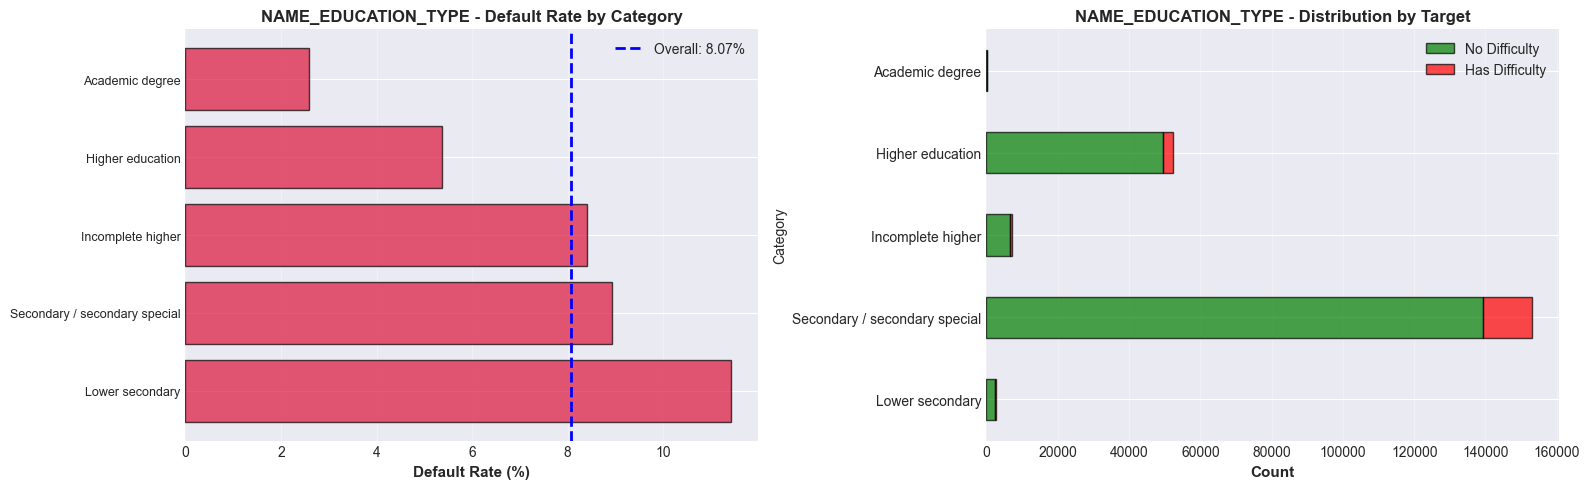



NAME_FAMILY_STATUS vs TARGET


,Category,Total_Count,No_Difficulty,Has_Difficulty,Default_Rate_%
NAME_FAMILY_STATUS,,,,,
Civil marriage,Civil marriage,20775,18699,2076,9.99
Single / not married,Single / not married,31692,28570,3122,9.85
Separated,Separated,13834,12707,1127,8.15
Married,Married,137714,127319,10395,7.55
Widow,Widow,11241,10583,658,5.85
Unknown,Unknown,2,2,0,0.00


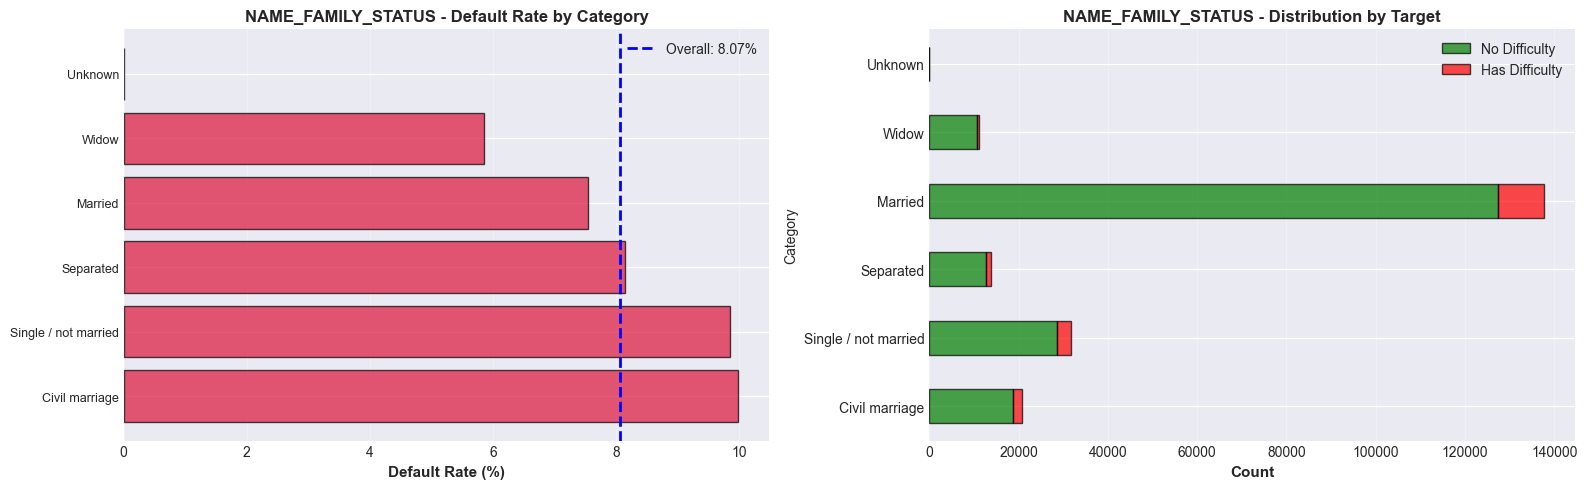

In [114]:
# Categorical vs Target
print("\n" + "="*100)
print("CATEGORICAL FEATURES vs TARGET".center(100))
print("="*100)

# Từng biến cat vs TARGET
for col in categorical_demo[:6]:  
    print(f"{col} vs TARGET")
    
    # Create crosstab
    ct = pd.crosstab(df[col], df['TARGET'], margins=True, normalize='index')
    ct_counts = pd.crosstab(df[col], df['TARGET'], margins=True)
    
    # Calculate default rate
    default_rate = (ct_counts[1] / (ct_counts[0] + ct_counts[1]) * 100).round(2)
    
    # Create summary table
    summary = pd.DataFrame({
        'Category': ct_counts.index[:-1],
        'Total_Count': ct_counts['All'][:-1],
        'No_Difficulty': ct_counts[0][:-1],
        'Has_Difficulty': ct_counts[1][:-1],
        'Default_Rate_%': default_rate[:-1]
    }).sort_values('Default_Rate_%', ascending=False)
    
    display(summary.head(10))
    
    # Visualize top categories
    if len(summary) <= 10:
        fig, axes = plt.subplots(1, 2, figsize=(16, 5))
        
        # Bar plot of default rates
        top_cats = summary.head(10)
        axes[0].barh(range(len(top_cats)), top_cats['Default_Rate_%'], 
                    color='crimson', edgecolor='black', alpha=0.7)
        axes[0].set_yticks(range(len(top_cats)))
        axes[0].set_yticklabels(top_cats['Category'], fontsize=9)
        axes[0].set_xlabel('Default Rate (%)', fontsize=11, fontweight='bold')
        axes[0].set_title(f'{col} - Default Rate by Category', fontsize=12, fontweight='bold')
        axes[0].grid(alpha=0.3, axis='x')
        
        # Add overall default rate line
        overall_default = (df['TARGET'].sum() / len(df)) * 100
        axes[0].axvline(overall_default, color='blue', linestyle='--', linewidth=2, 
                       label=f'Overall: {overall_default:.2f}%')
        axes[0].legend()
        
        # Stacked bar chart
        top_cats.set_index('Category')[['No_Difficulty', 'Has_Difficulty']].plot(
            kind='barh', stacked=True, ax=axes[1], color=['green', 'red'], 
            edgecolor='black', alpha=0.7)
        axes[1].set_xlabel('Count', fontsize=11, fontweight='bold')
        axes[1].set_title(f'{col} - Distribution by Target', fontsize=12, fontweight='bold')
        axes[1].legend(['No Difficulty', 'Has Difficulty'], loc='best')
        axes[1].grid(alpha=0.3, axis='x')
        
        plt.tight_layout()
        plt.show()
    
    print("\n")

CORRELATION MATRIX


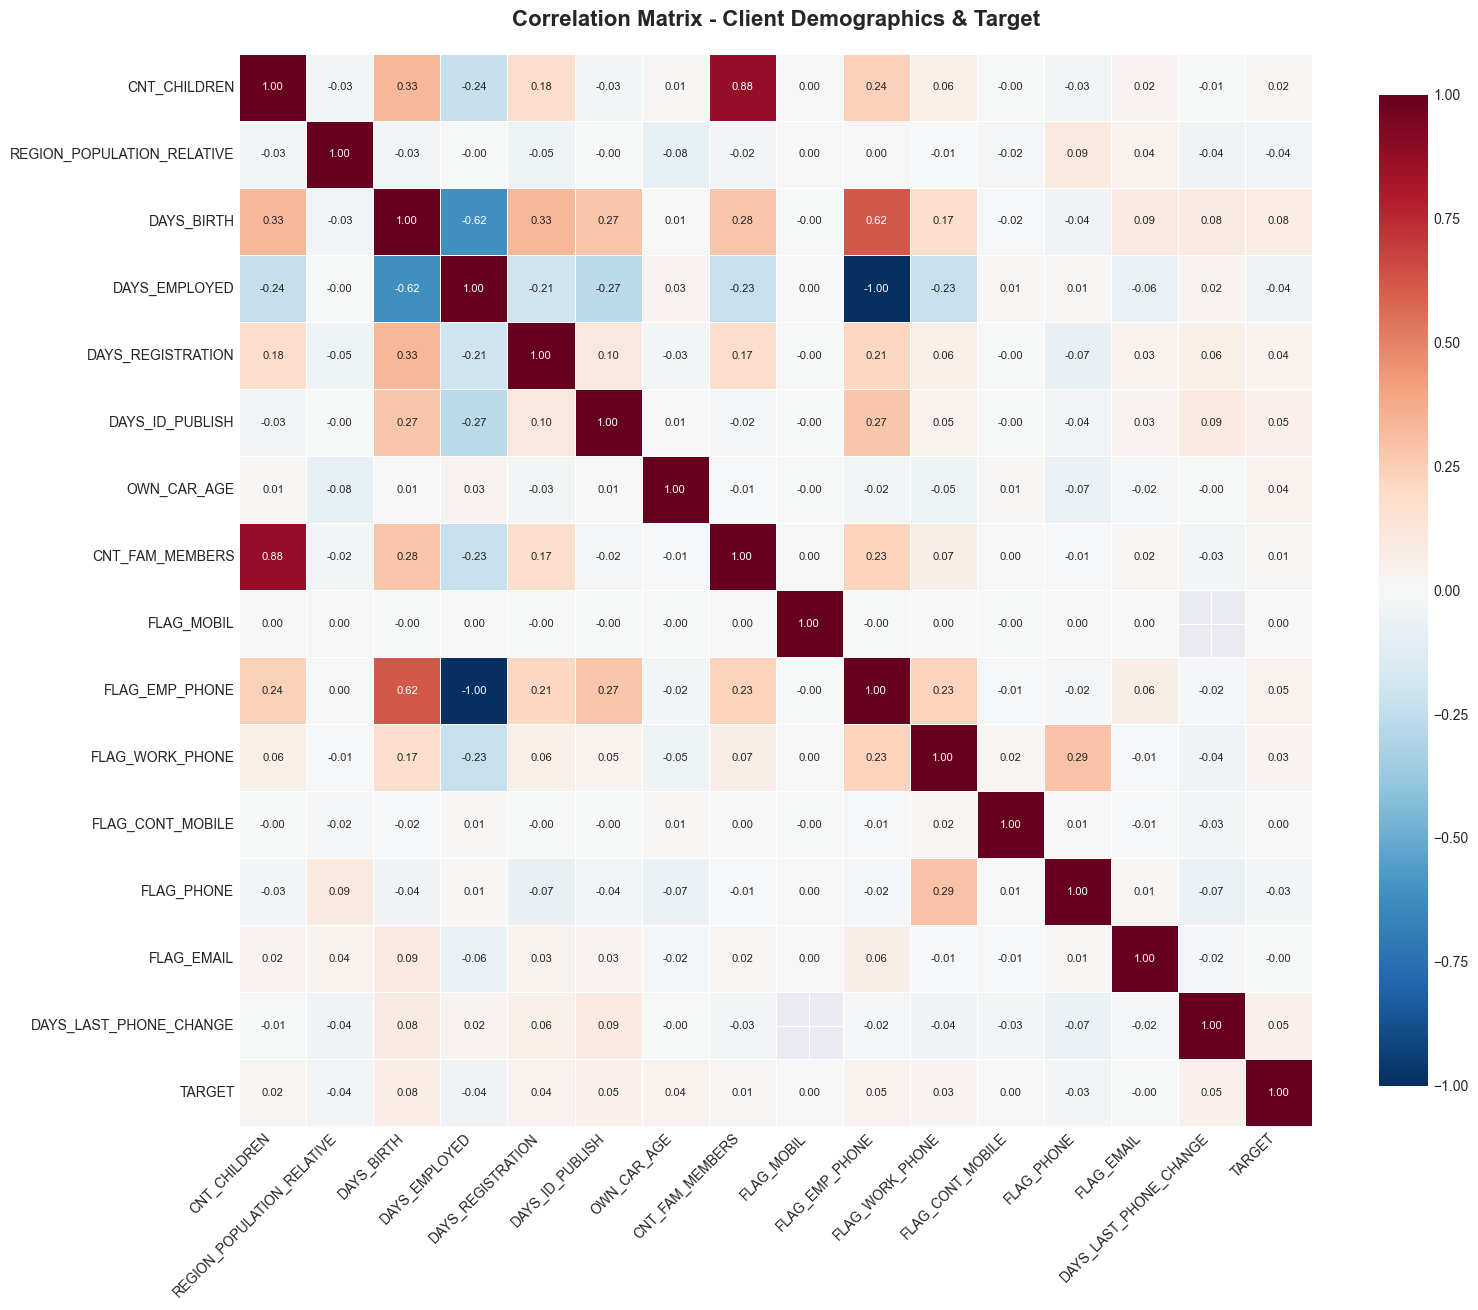

In [119]:
# Ma trận tương quan
print("CORRELATION MATRIX")

corr_cols = numerical_demo.copy()
if 'TARGET' not in corr_cols:
    corr_cols.append('TARGET')

corr_matrix = df[corr_cols].corr()

# Heatmap
fig, ax = plt.subplots(figsize=(16, 14))

sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='RdBu_r', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8},
            vmin=-1, vmax=1, ax=ax, annot_kws={'fontsize': 8})

ax.set_title('Correlation Matrix - Client Demographics & Target', fontsize=16, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()

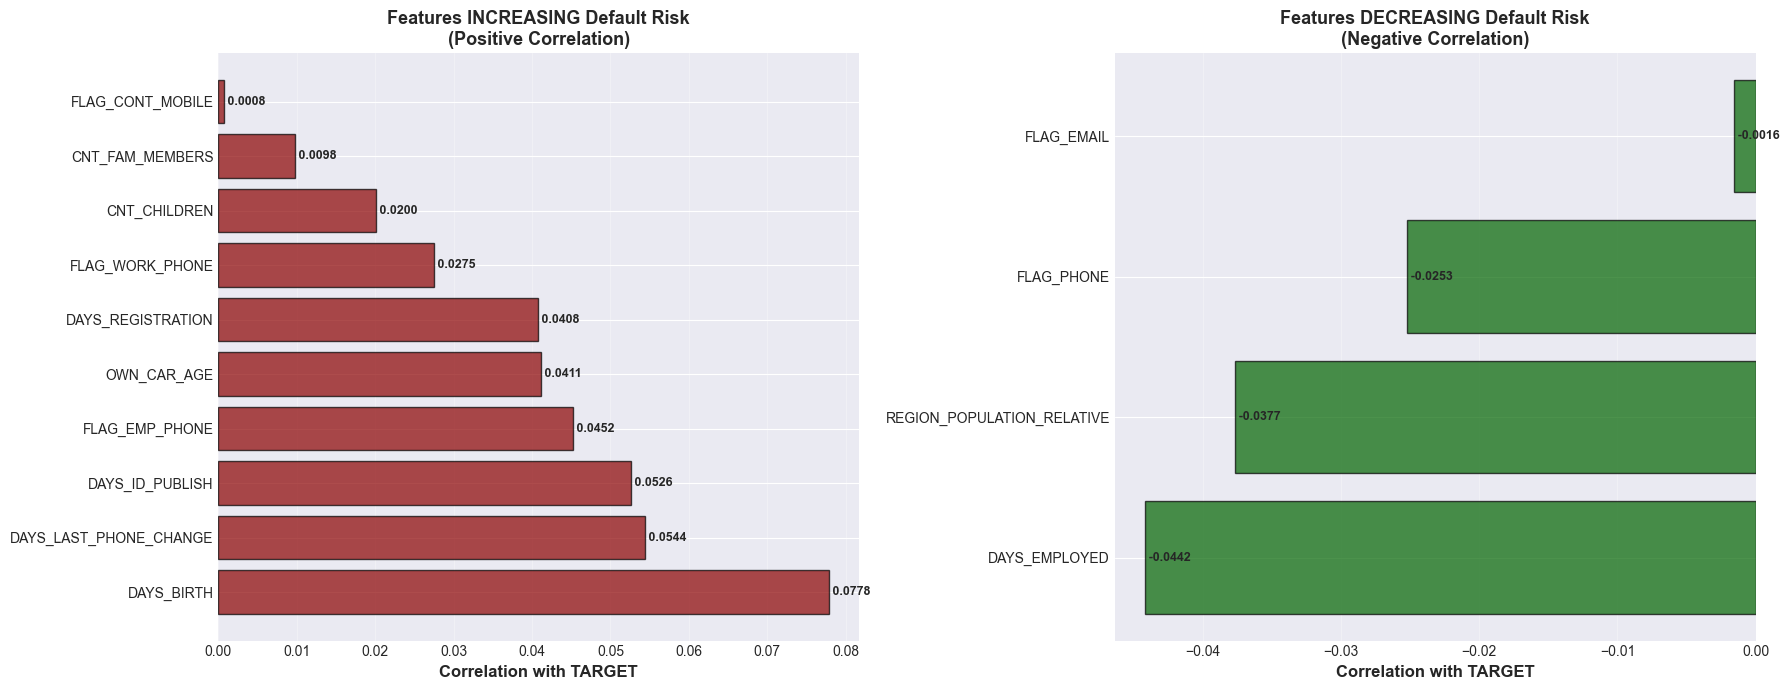


💡 KEY INSIGHTS:
   • RED bars (positive correlation): Higher values → Higher default risk
   • GREEN bars (negative correlation): Higher values → Lower default risk
   • Use these insights for feature engineering and model interpretation


In [123]:
top_features = corr_df.nlargest(15, 'Abs_Correlation')

fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Top positive correlations (increase default risk)
positive_corr = corr_df[corr_df['Correlation'] > 0].nlargest(10, 'Correlation')
if len(positive_corr) > 0:
    axes[0].barh(range(len(positive_corr)), positive_corr['Correlation'], 
                color='darkred', edgecolor='black', alpha=0.7)
    axes[0].set_yticks(range(len(positive_corr)))
    axes[0].set_yticklabels(positive_corr['Variable'], fontsize=10)
    axes[0].set_xlabel('Correlation with TARGET', fontsize=12, fontweight='bold')
    axes[0].set_title('Features INCREASING Default Risk\n(Positive Correlation)', 
                     fontsize=13, fontweight='bold')
    axes[0].grid(alpha=0.3, axis='x')
    
    for i, (idx, row) in enumerate(positive_corr.iterrows()):
        axes[0].text(row['Correlation'], i, f" {row['Correlation']:.4f}", 
                    va='center', fontsize=9, fontweight='bold')

# Top negative correlations (decrease default risk)
negative_corr = corr_df[corr_df['Correlation'] < 0].nsmallest(10, 'Correlation')
if len(negative_corr) > 0:
    axes[1].barh(range(len(negative_corr)), negative_corr['Correlation'], 
                color='darkgreen', edgecolor='black', alpha=0.7)
    axes[1].set_yticks(range(len(negative_corr)))
    axes[1].set_yticklabels(negative_corr['Variable'], fontsize=10)
    axes[1].set_xlabel('Correlation with TARGET', fontsize=12, fontweight='bold')
    axes[1].set_title('Features DECREASING Default Risk\n(Negative Correlation)', 
                     fontsize=13, fontweight='bold')
    axes[1].grid(alpha=0.3, axis='x')
    
    for i, (idx, row) in enumerate(negative_corr.iterrows()):
        axes[1].text(row['Correlation'], i, f" {row['Correlation']:.4f}", 
                    va='center', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n💡 KEY INSIGHTS:")
print("   • RED bars (positive correlation): Higher values → Higher default risk")
print("   • GREEN bars (negative correlation): Higher values → Lower default risk")
print("   • Use these insights for feature engineering and model interpretation")